In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import lovelyplots
import matplotlib.pyplot as plt
plt.style.use(['ipynb'])

cgtp_dense_color = plt.cm.get_cmap('Reds')(0.8)
cgtp_sparse_color = plt.cm.get_cmap('Reds')(0.4)
gtp_naive_color = plt.cm.get_cmap('Blues')(0.8)
gtp_original_color = plt.cm.get_cmap('Blues')(0.4)

import numpy as np

/tmp/ipykernel_664832/1177052810.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cgtp_dense_color = plt.cm.get_cmap('Reds')(0.8)
/tmp/ipykernel_664832/1177052810.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cgtp_sparse_color = plt.cm.get_cmap('Reds')(0.4)
/tmp/ipykernel_664832/1177052810.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  gtp_naive_color = plt.cm.get_cmap('Blues')(0.8)
/tmp/ipykernel_664832/1177052810.py:9: MatplotlibDeprecationWarning: The get_cmap

In [3]:
df = pd.read_csv("csv/nsight_profiling.csv")
df = df.sort_values('lmax')


In [14]:
def query_table(df, irreps_type, tensor_product_type, batch, property):
    return df[(df['irreps_type'] == irreps_type) \
        & (df['tensor_product_type'] == tensor_product_type) \
        & (df['batch'] == batch) & (~df['lmax'].isin([7,8]))][property]

def plot_walltimes_gpu(irreps_type, batch):
    plt.semilogy(query_table(df, f"{irreps_type}", "CGTP-dense", batch, "lmax"), query_table(df, f"{irreps_type}","CGTP-dense" , batch, "Time")*1000, label="Clebsch-Gordan (Naive)", color=cgtp_dense_color)
    plt.semilogy(query_table(df, f"{irreps_type}", "CGTP-sparse", batch, "lmax"), query_table(df, f"{irreps_type}", "CGTP-sparse", batch, "Time")*1000, label="Clebsch-Gordan (Sparse)", color=cgtp_sparse_color)
    plt.semilogy(query_table(df, f"{irreps_type}", "GTP-grid", batch, "lmax"), query_table(df, f"{irreps_type}", "GTP-grid", batch, "Time")*1000, label="Gaunt (Naive Grid)", marker="^", color=gtp_naive_color)
    plt.semilogy(query_table(df, f"{irreps_type}", "GTP-fourier", batch, "lmax"), query_table(df, f"{irreps_type}", "GTP-fourier", batch, "Time")*1000, label="Gaunt (Original Grid)", marker="^", color=gtp_original_color)
    plt.ylabel("Walltime (ms)")
    plt.xlabel("$L_{max}$")
    plt.ylim(10**-3, 10**2)
    plt.xticks(range(1, 7))
    plt.title(f"Walltime (GPU) for {irreps_type}")
    plt.grid(linestyle='--')
    plt.tight_layout()
    # plt.legend(ncol=2)
    plt.savefig(f"plots/walltime_gpu_{irreps_type}.pdf")
    plt.show()
    

def plot_all_gflops_s_gpu(irreps_type, batch):
    plt.semilogy(query_table(df, f"{irreps_type}", "CGTP-dense", batch, "lmax"), query_table(df, f"{irreps_type}", "CGTP-dense", batch, "all GFLOPs/s"), label="Clebsch-Gordan (Naive)", color=cgtp_dense_color)
    plt.semilogy(query_table(df, f"{irreps_type}", "CGTP-sparse", batch, "lmax"), query_table(df, f"{irreps_type}", "CGTP-sparse", batch, "all GFLOPs/s"), label="Clebsch-Gordan (Sparse)", color=cgtp_sparse_color)
    plt.semilogy(query_table(df, f"{irreps_type}", "GTP-grid", batch, "lmax"), query_table(df, f"{irreps_type}", "GTP-grid", batch, "all GFLOPs/s"), label="Gaunt (Naive)", marker="^", color=gtp_naive_color)
    plt.semilogy(query_table(df, f"{irreps_type}", "GTP-fourier", batch, "lmax"), query_table(df, f"{irreps_type}", "GTP-fourier", batch, "all GFLOPs/s"), label="Gaunt (Original)", marker="^", color=gtp_original_color)
    plt.ylabel("GFLOP/s")
    plt.xlabel("$L_{max}$")
    plt.ylim(10**-3, 10**6)
    plt.text(4.68, 315500, "Tensor Core: 136.4 TFLOP/s", horizontalalignment='center', verticalalignment='center', fontsize=8, color='black')
    plt.axhline(136400, linestyle='--', color='purple')
    plt.text(4.3, 35500, "FP32: 17.05 TFLOP/s", horizontalalignment='center', verticalalignment='center', fontsize=8, color='black')
    plt.axhline(17050, linestyle='--', color='teal')
    plt.xticks(range(1, 7))
    plt.yticks([10**i for i in range(-3, 7)])
    plt.title(f"Average Throughput for {irreps_type}")
    plt.grid(linestyle='--')
    plt.tight_layout()
    plt.savefig(f"plots/avg_all_glfops_{irreps_type}.pdf")
    plt.show()

def plot_cc_gflops_s_gpu(irreps_type, batch):
    plt.semilogy(query_table(df, f"{irreps_type}", "CGTP-dense", batch, "lmax"), query_table(df, f"{irreps_type}", "CGTP-dense", batch, "CC GFLOPs/s"), label="Clebsch-Gordan (Naive)", color=cgtp_dense_color)
    plt.semilogy(query_table(df, f"{irreps_type}", "CGTP-sparse", batch, "lmax"), query_table(df, f"{irreps_type}", "CGTP-sparse", batch, "CC GFLOPs/s"), label="Clebsch-Gordan (Sparse)", color=cgtp_sparse_color)
    plt.semilogy(query_table(df, f"{irreps_type}", "GTP-grid", batch, "lmax"), query_table(df, f"{irreps_type}", "GTP-grid", batch, "CC GFLOPs/s"), label="Gaunt (Naive)", marker="^", color=gtp_naive_color)
    plt.semilogy(query_table(df, f"{irreps_type}", "GTP-fourier", batch, "lmax"), query_table(df, f"{irreps_type}", "GTP-fourier", batch, "CC GFLOPs/s"), label="Gaunt (Original)", marker="^", color=gtp_original_color)
    plt.ylabel("GFLOP/s")
    plt.xlabel("$L_{max}$")
    plt.ylim(10**-3, 10**6)
    plt.text(4.3, 35500, "FP32: 17.05 TFLOP/s", horizontalalignment='center', verticalalignment='center', fontsize=8, color='black')
    plt.axhline(17050, linestyle='--', color='teal')
    plt.xticks(range(1, 7))
    plt.yticks([10**i for i in range(-3, 7)])
    plt.title(f"FP32 Average Throughput for {irreps_type}", fontsize=12)
    plt.grid(linestyle='--')
    plt.tight_layout()
    plt.savefig(f"plots/avg_cc_glfops_{irreps_type}.pdf")
    plt.show()
    
def plot_tc_gflops_s_gpu(irreps_type, batch):
    plt.semilogy(query_table(df, f"{irreps_type}", "CGTP-dense", batch, "lmax"), query_table(df, f"{irreps_type}", "CGTP-dense", batch, "TC GFLOPs/s"), label="Clebsch-Gordan (Naive)", color=cgtp_dense_color)
    plt.semilogy(query_table(df, f"{irreps_type}", "CGTP-sparse", batch, "lmax"), query_table(df, f"{irreps_type}", "CGTP-sparse", batch, "TC GFLOPs/s"), label="Clebsch-Gordan (Sparse)", color=cgtp_sparse_color)
    plt.semilogy(query_table(df, f"{irreps_type}", "GTP-grid", batch, "lmax"), query_table(df, f"{irreps_type}", "GTP-grid", batch, "TC GFLOPs/s"), label="Gaunt (Naive)", marker="^", color=gtp_naive_color)
    plt.semilogy(query_table(df, f"{irreps_type}", "GTP-fourier", batch, "lmax"), query_table(df, f"{irreps_type}", "GTP-fourier", batch, "TC GFLOPs/s"), label="Gaunt (Original)", marker="^", color=gtp_original_color)
    plt.ylabel("GFLOP/s")
    plt.xlabel("$L_{max}$")
    plt.ylim(10**-3, 10**6)
    plt.text(4.68, 315500, "Tensor Cores: 136.4 TFLOP/s", horizontalalignment='center', verticalalignment='center', fontsize=8, color='black')
    plt.axhline(136400, linestyle='--', color='purple')
    plt.xticks(range(1, 7))
    plt.yticks([10**i for i in range(-3, 7)])
    plt.title(f"Tensor Cores Average Throughput for {irreps_type}", fontsize=12)
    plt.grid(linestyle='--')
    plt.tight_layout()
    plt.savefig(f"plots/avg_tc_glfops_{irreps_type}.pdf")
    plt.show()


def plot_gb_s_gpu(irreps_type, batch):
    plt.semilogy(query_table(df, f"{irreps_type}", "CGTP-dense", batch, "lmax"), query_table(df, f"{irreps_type}", "CGTP-dense", batch, "GB/s"), label="Clebsch-Gordan (Naive)", color=cgtp_dense_color)
    plt.semilogy(query_table(df, f"{irreps_type}", "CGTP-sparse", batch, "lmax"), query_table(df, f"{irreps_type}", "CGTP-sparse", batch, "GB/s"), label="Clebsch-Gordan (Sparse)", color=cgtp_sparse_color)
    plt.semilogy(query_table(df, f"{irreps_type}", "GTP-grid", batch, "lmax"), query_table(df, f"{irreps_type}", "GTP-grid", batch, "GB/s"), label="Gaunt (Naive)", marker="^", color=gtp_naive_color)
    plt.semilogy(query_table(df, f"{irreps_type}", "GTP-fourier", batch, "lmax"), query_table(df, f"{irreps_type}", "GTP-fourier", batch, "GB/s"), label="Gaunt (Original)", marker="^", color=gtp_original_color)
    plt.ylabel("GB/s")
    plt.xlabel("$L_{max}$")
    plt.text(4.3, 1500, "DRAM: 768 GB/s", horizontalalignment='center', verticalalignment='center', fontsize=8, color='black')
    plt.axhline(768, linestyle='--', color='blue')
    plt.xticks(range(1, 7))
    plt.title(f"Average Bandwidth for {irreps_type}")
    plt.ylim(10**-3, 10**3.5)
    plt.grid(linestyle='--')
    plt.tight_layout()
    plt.savefig(f"plots/avg_gbs_{irreps_type}.pdf")
    plt.show()

    

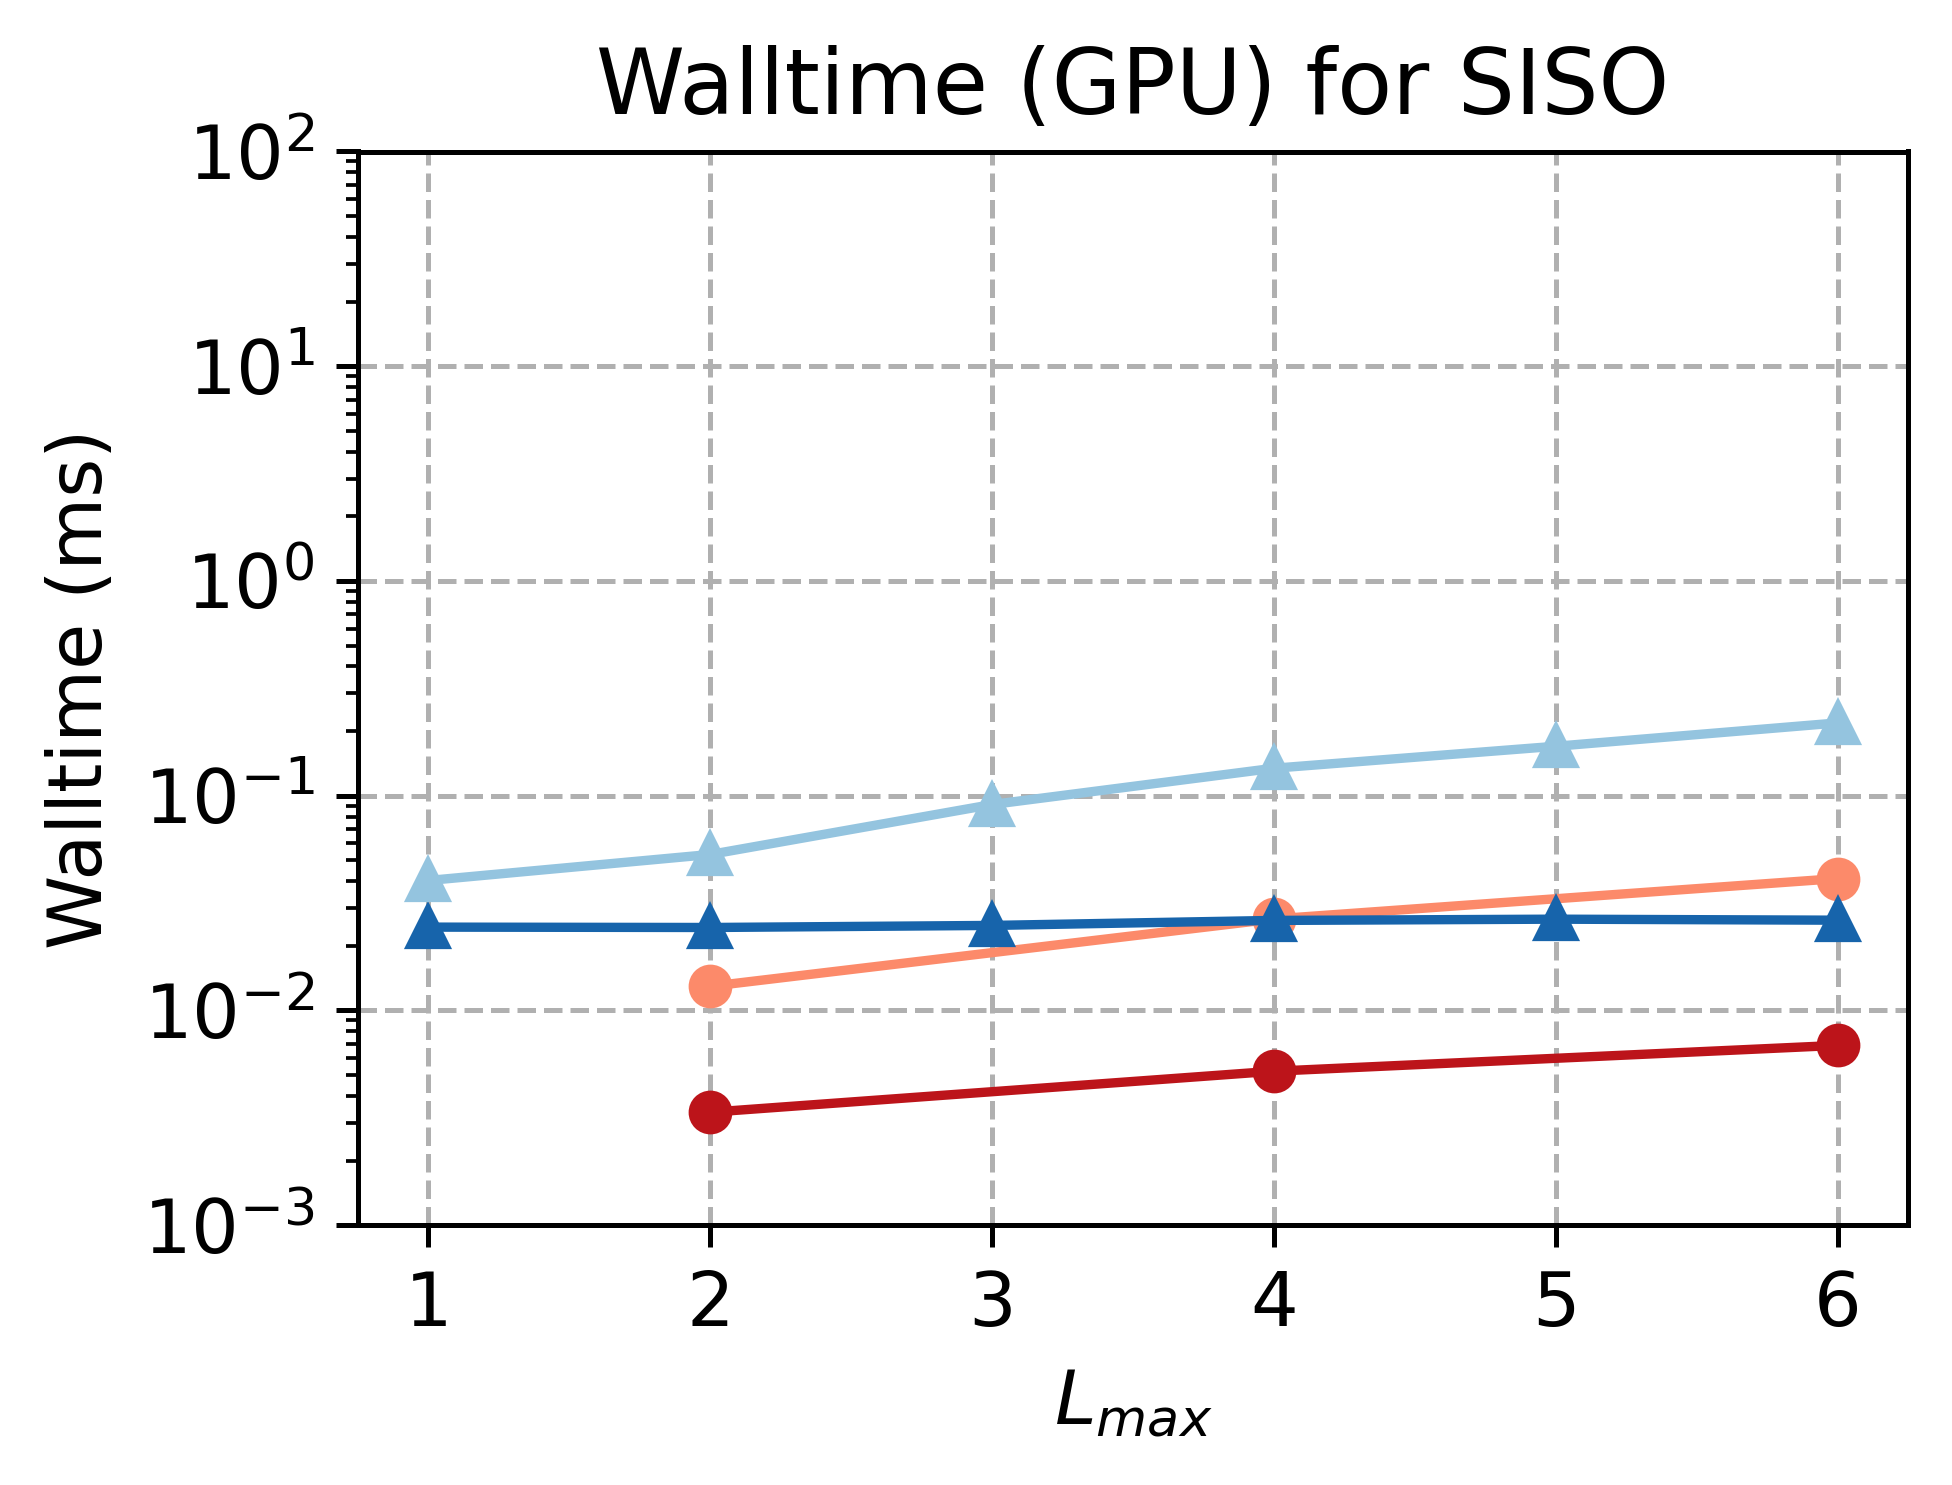

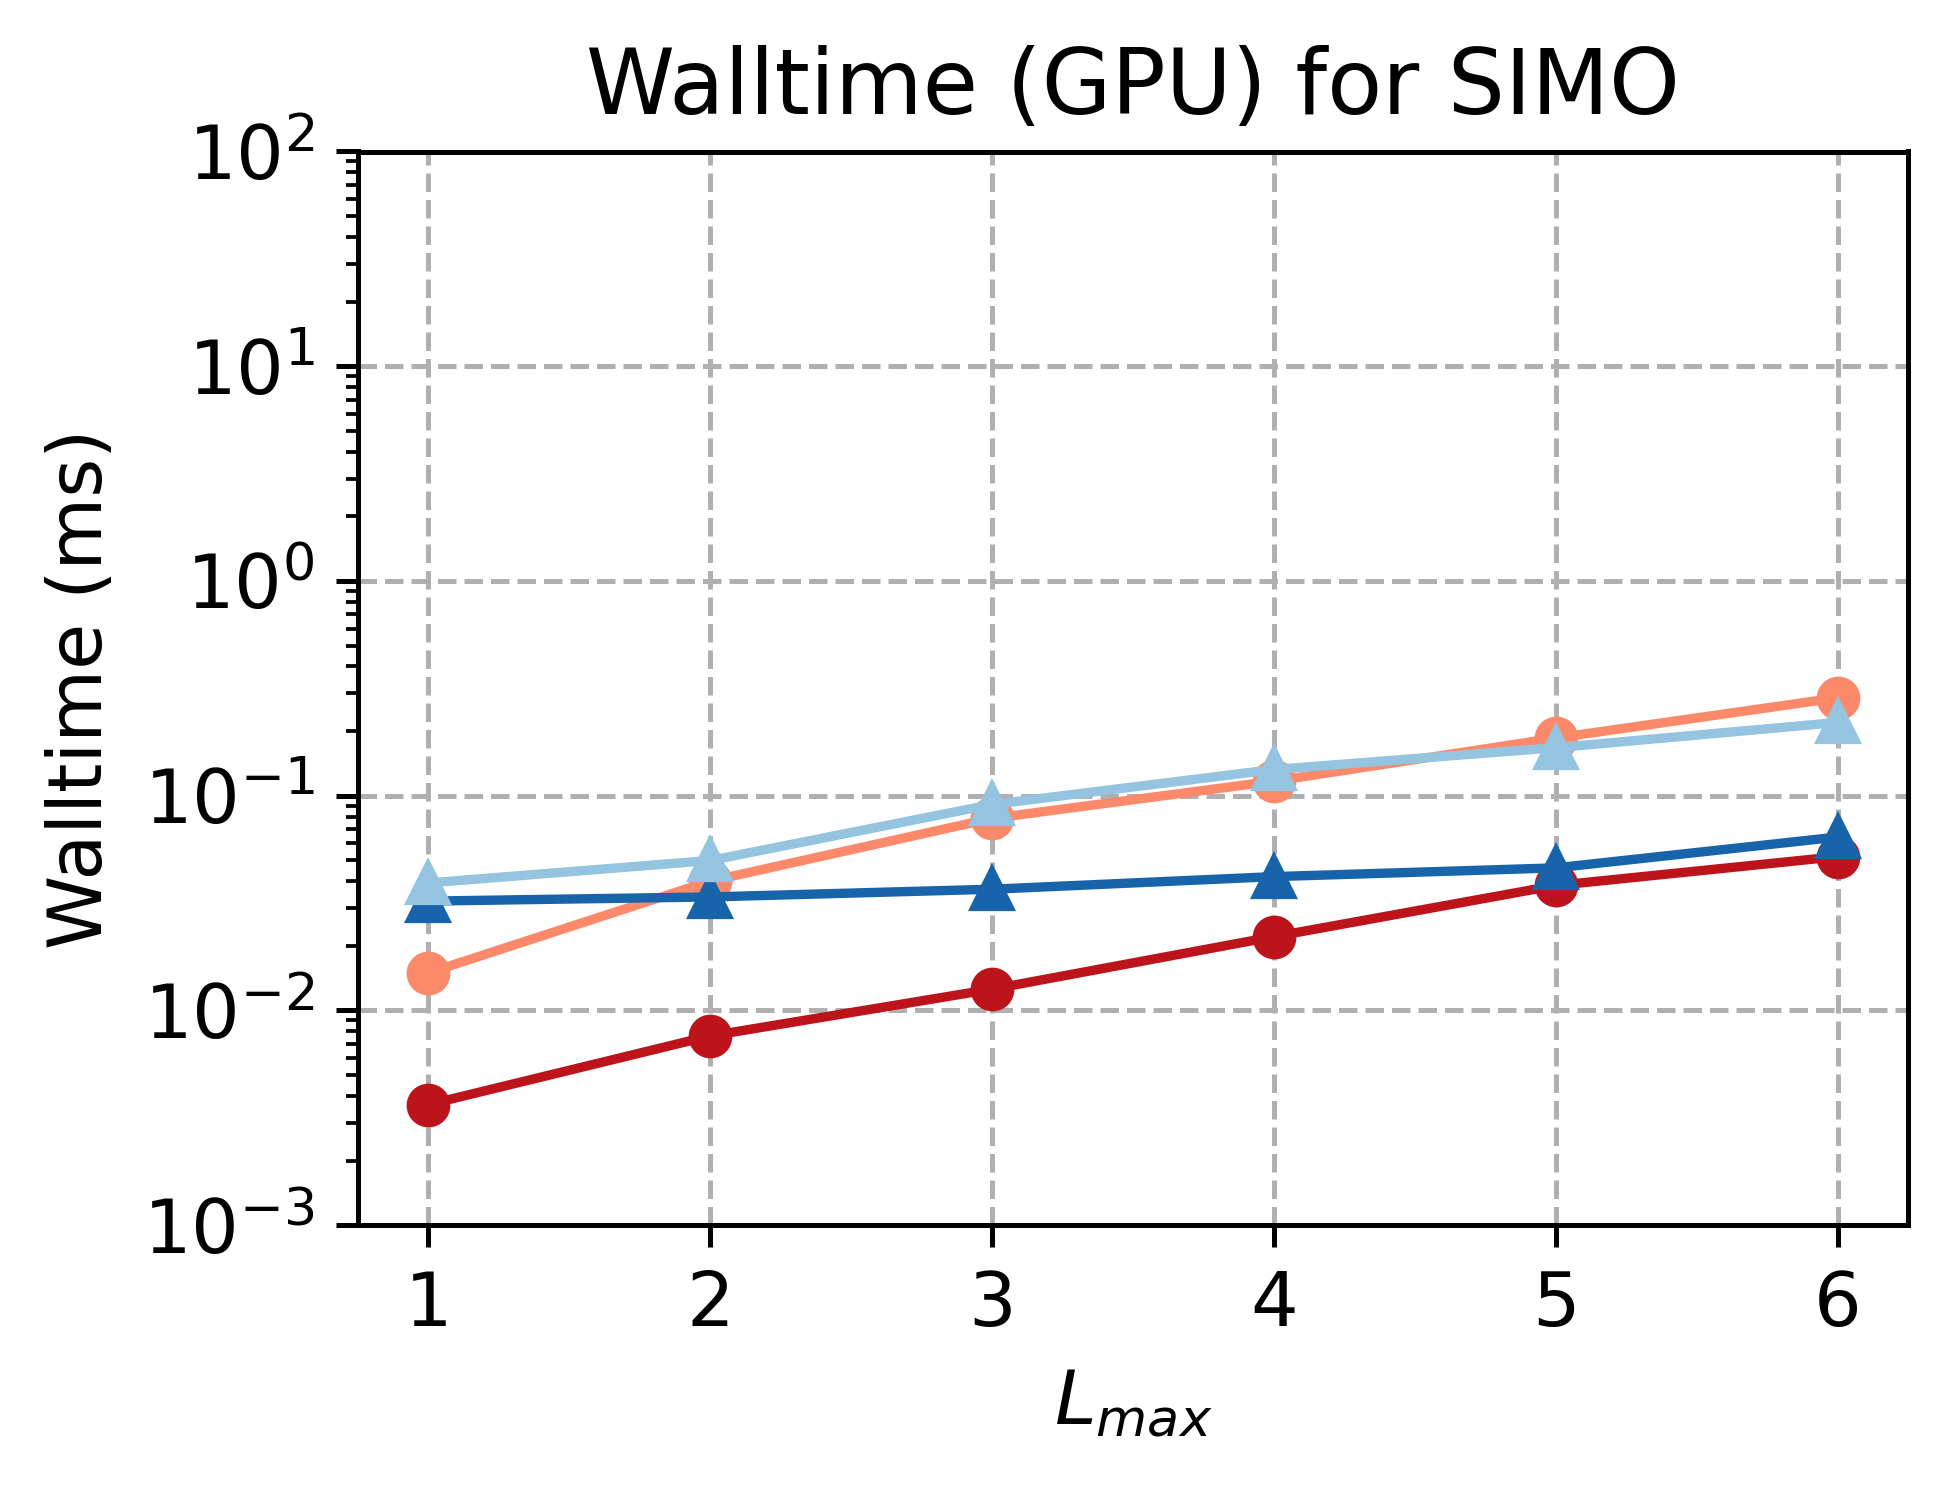

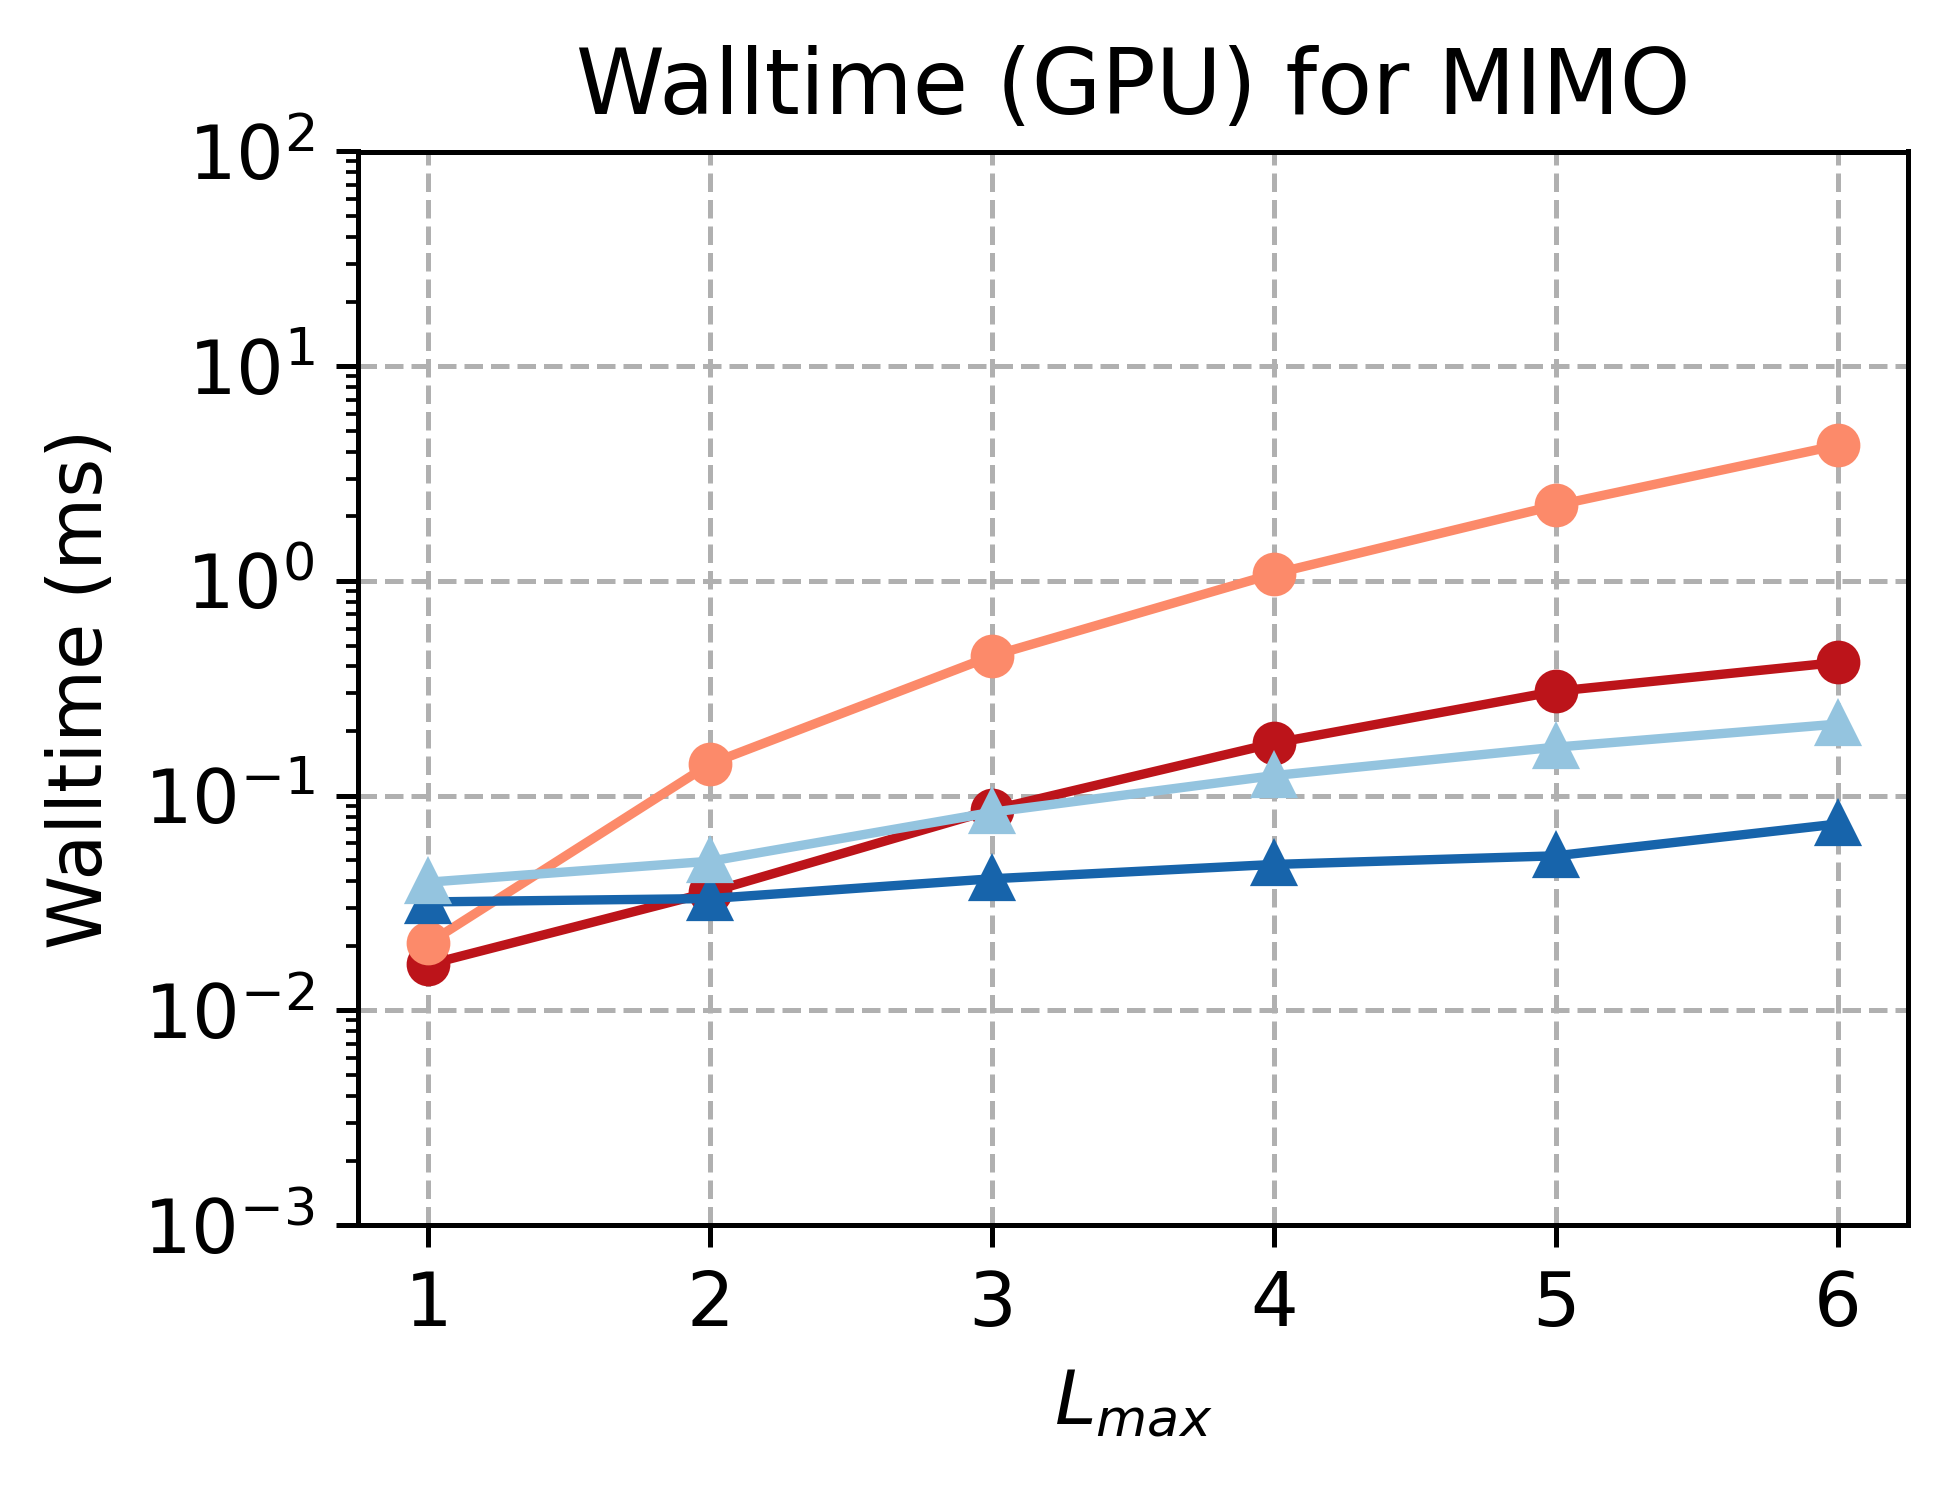

In [15]:

plot_walltimes_gpu("SISO", 1)
plot_walltimes_gpu("SIMO", 1)
plot_walltimes_gpu("MIMO", 1)

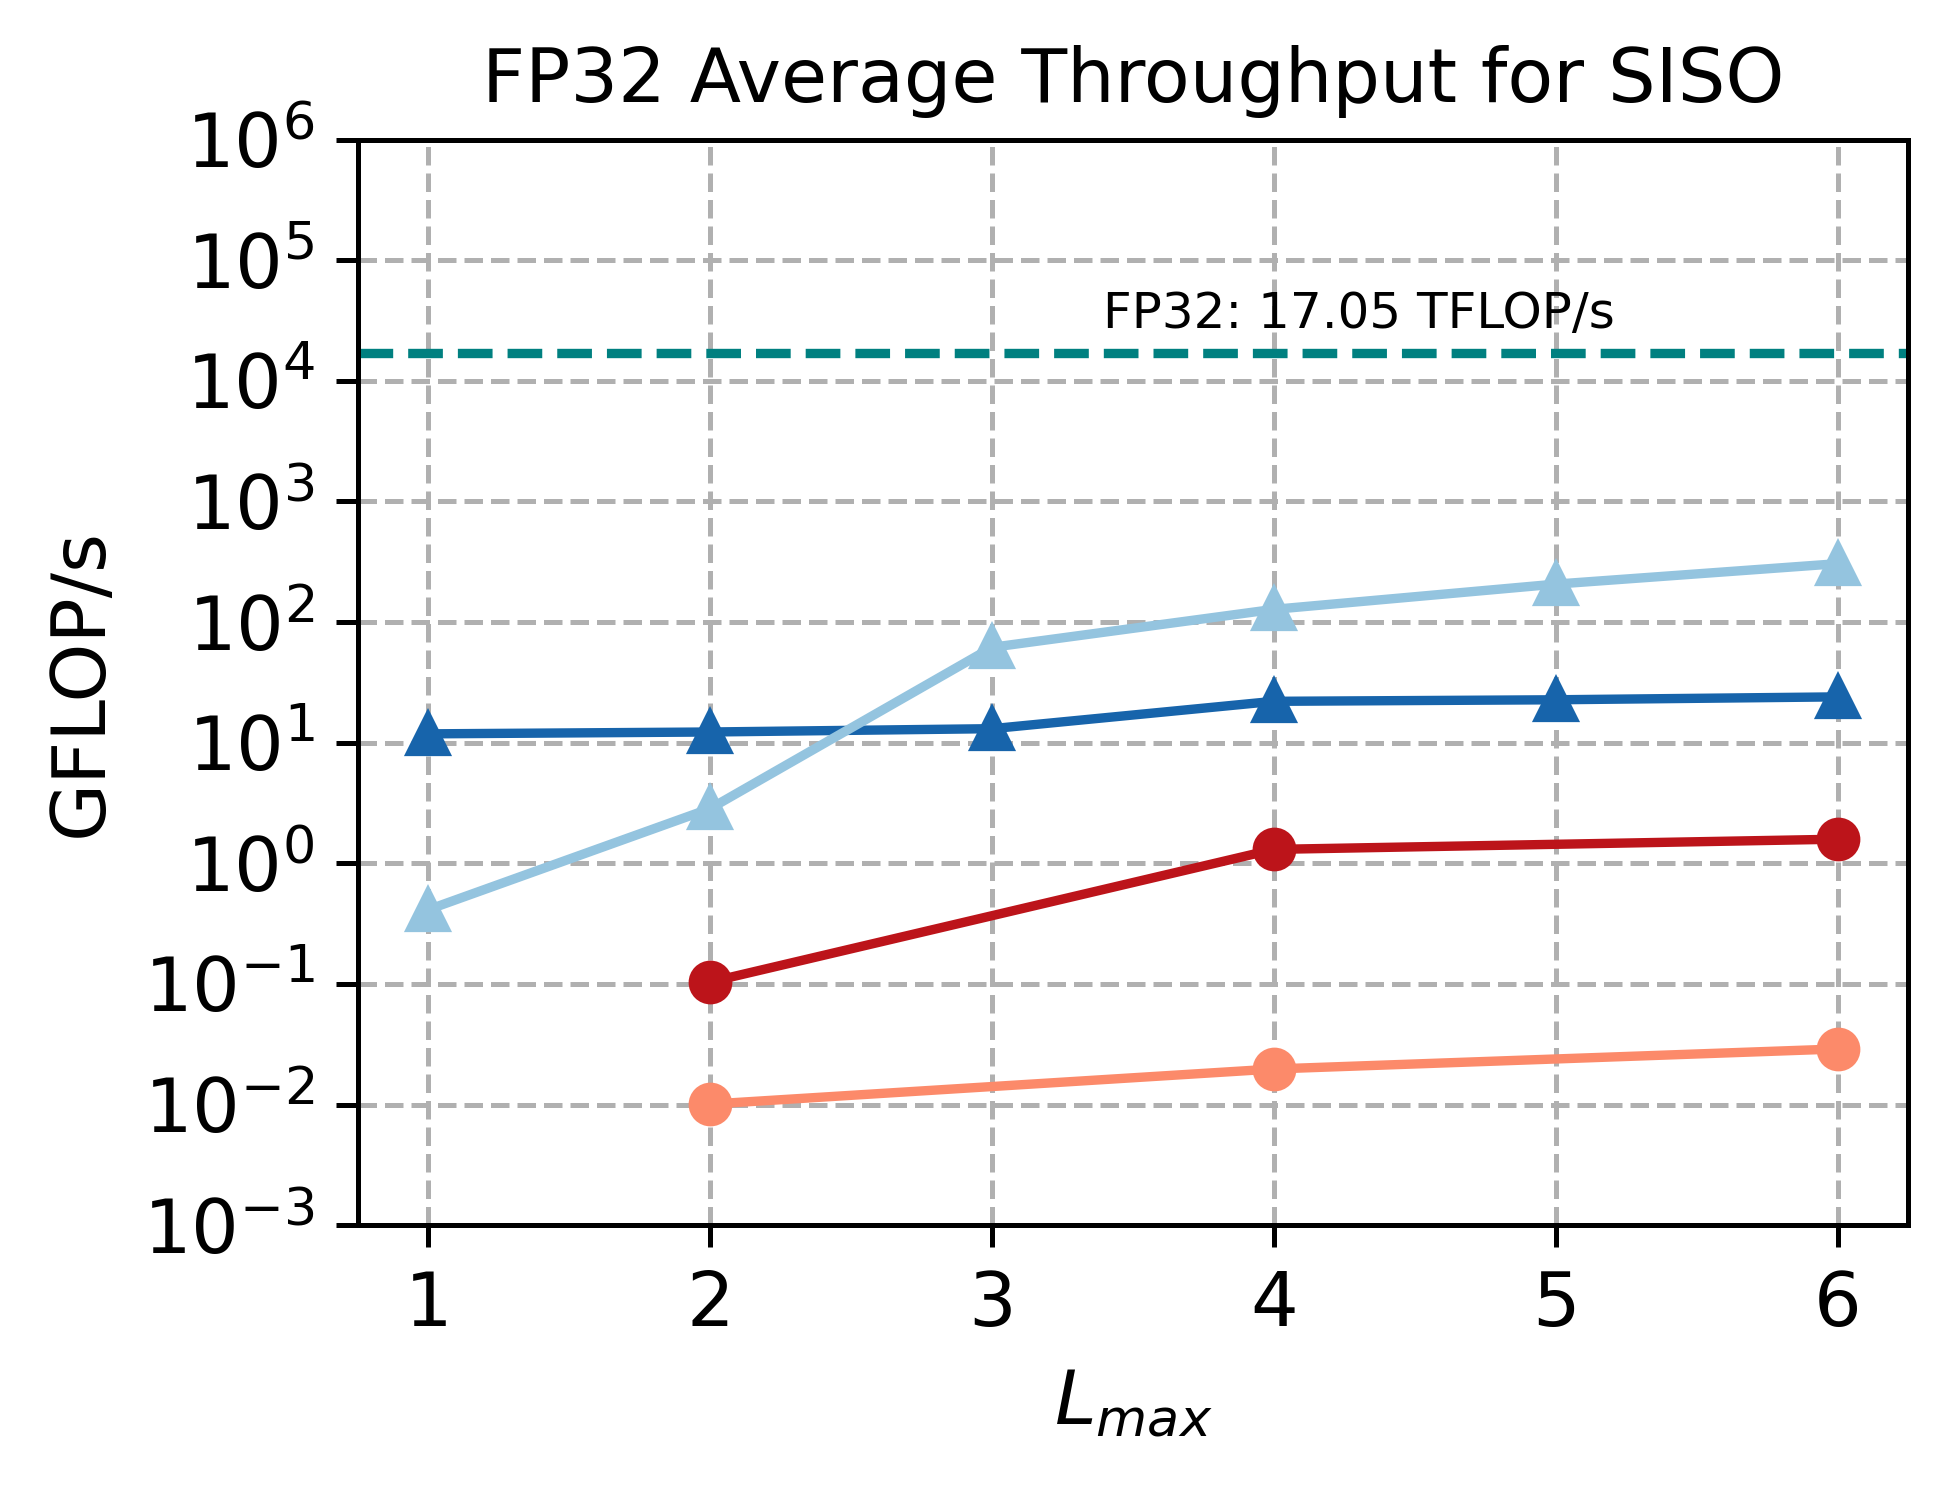

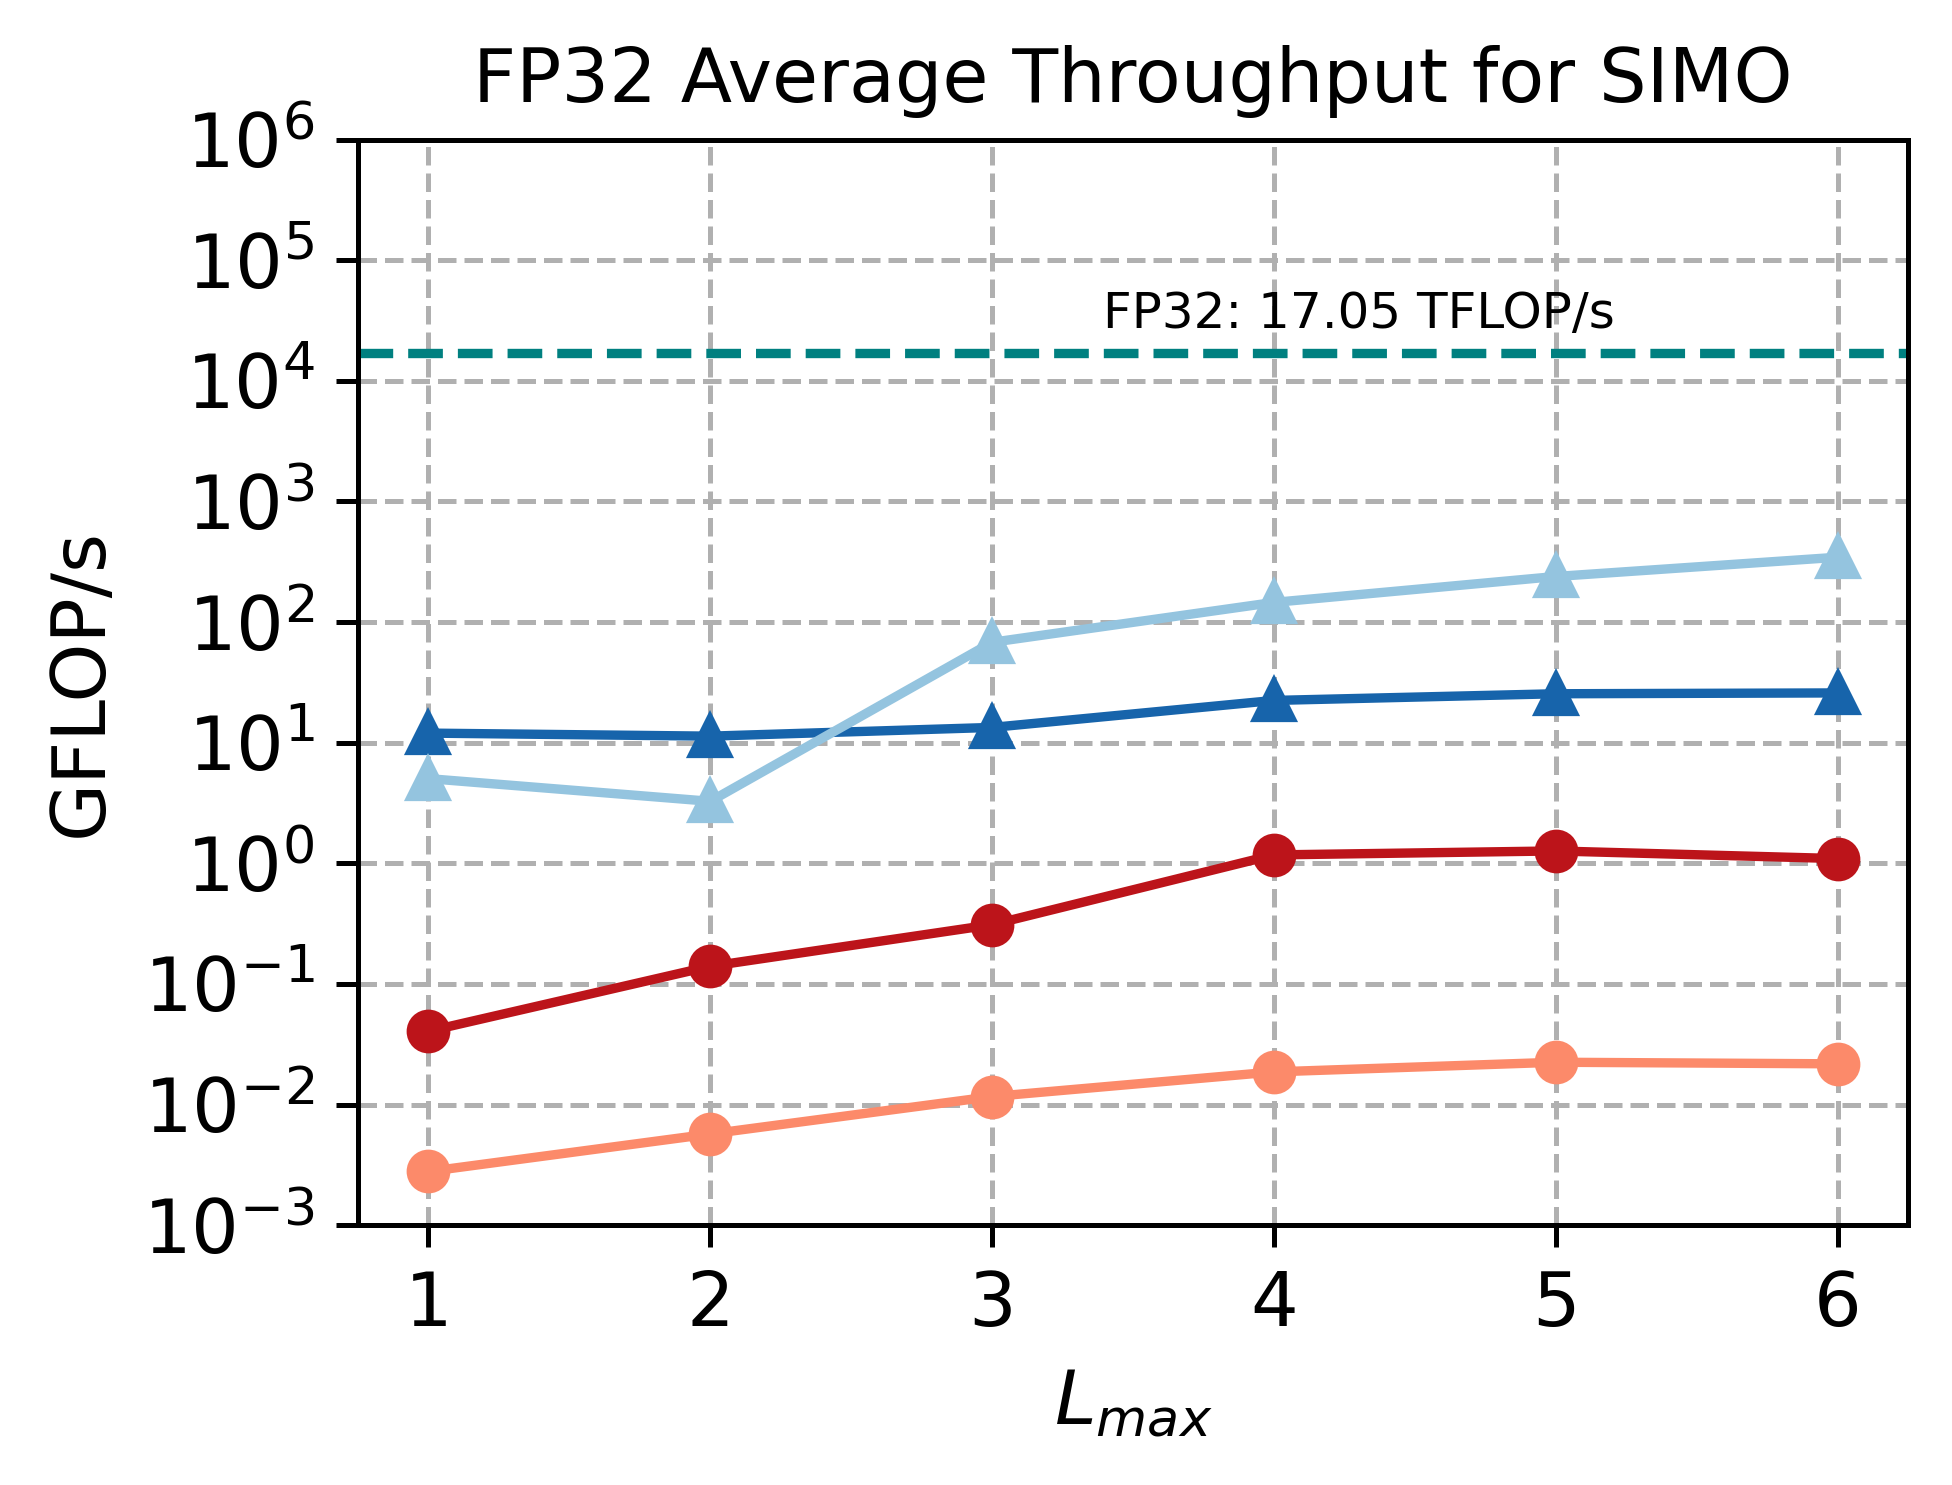

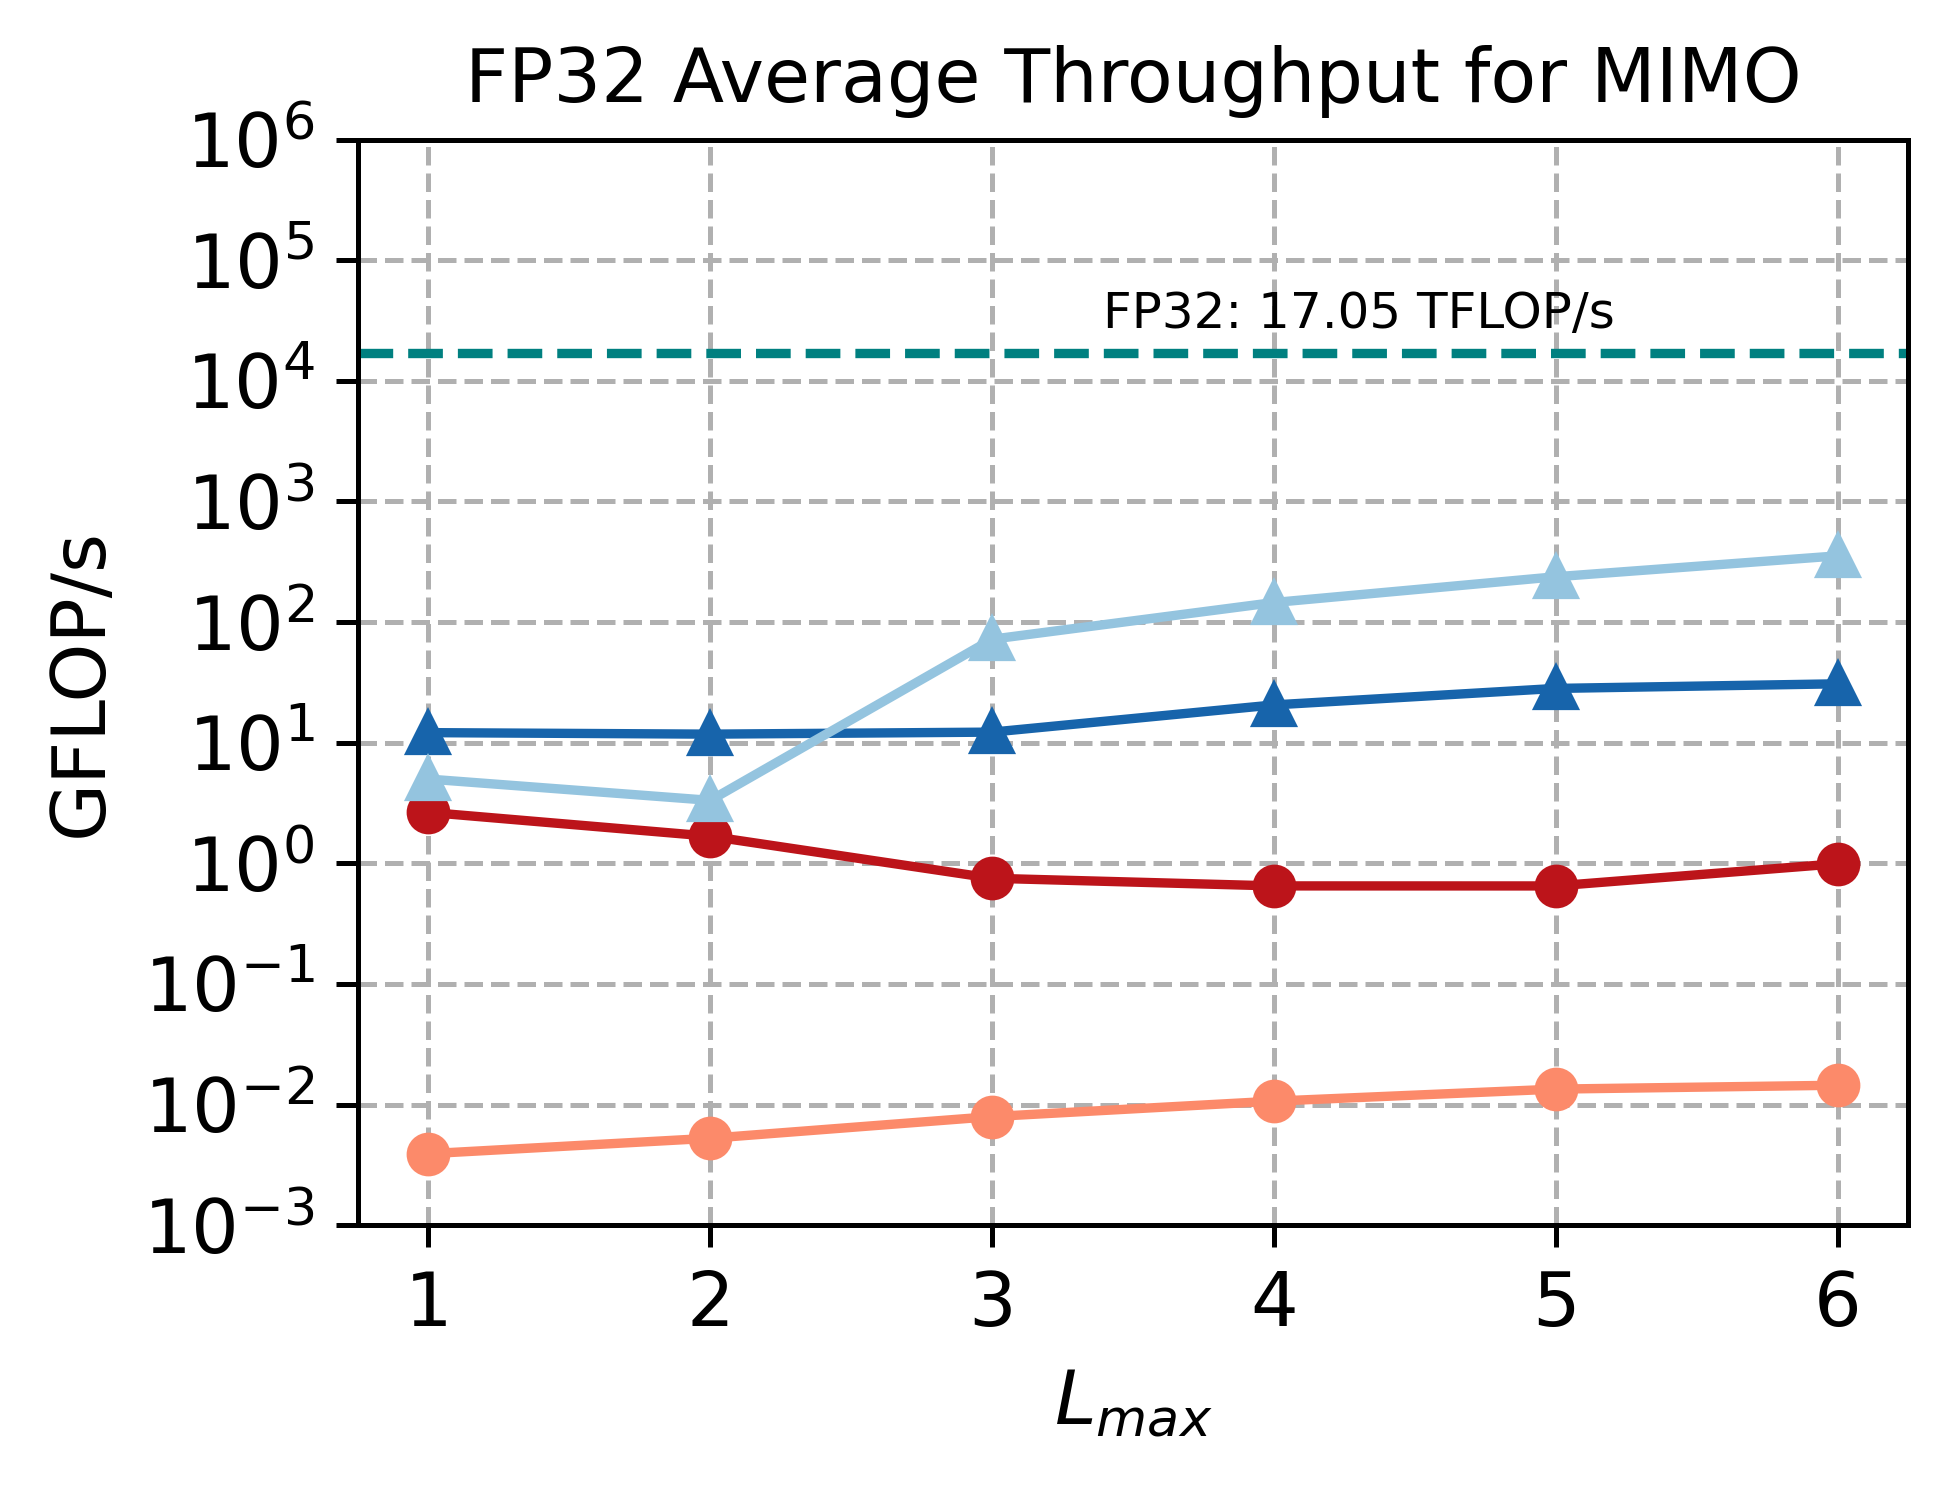

In [17]:
plot_cc_gflops_s_gpu("SISO", 1)
plot_cc_gflops_s_gpu("SIMO", 1)
plot_cc_gflops_s_gpu("MIMO", 1)

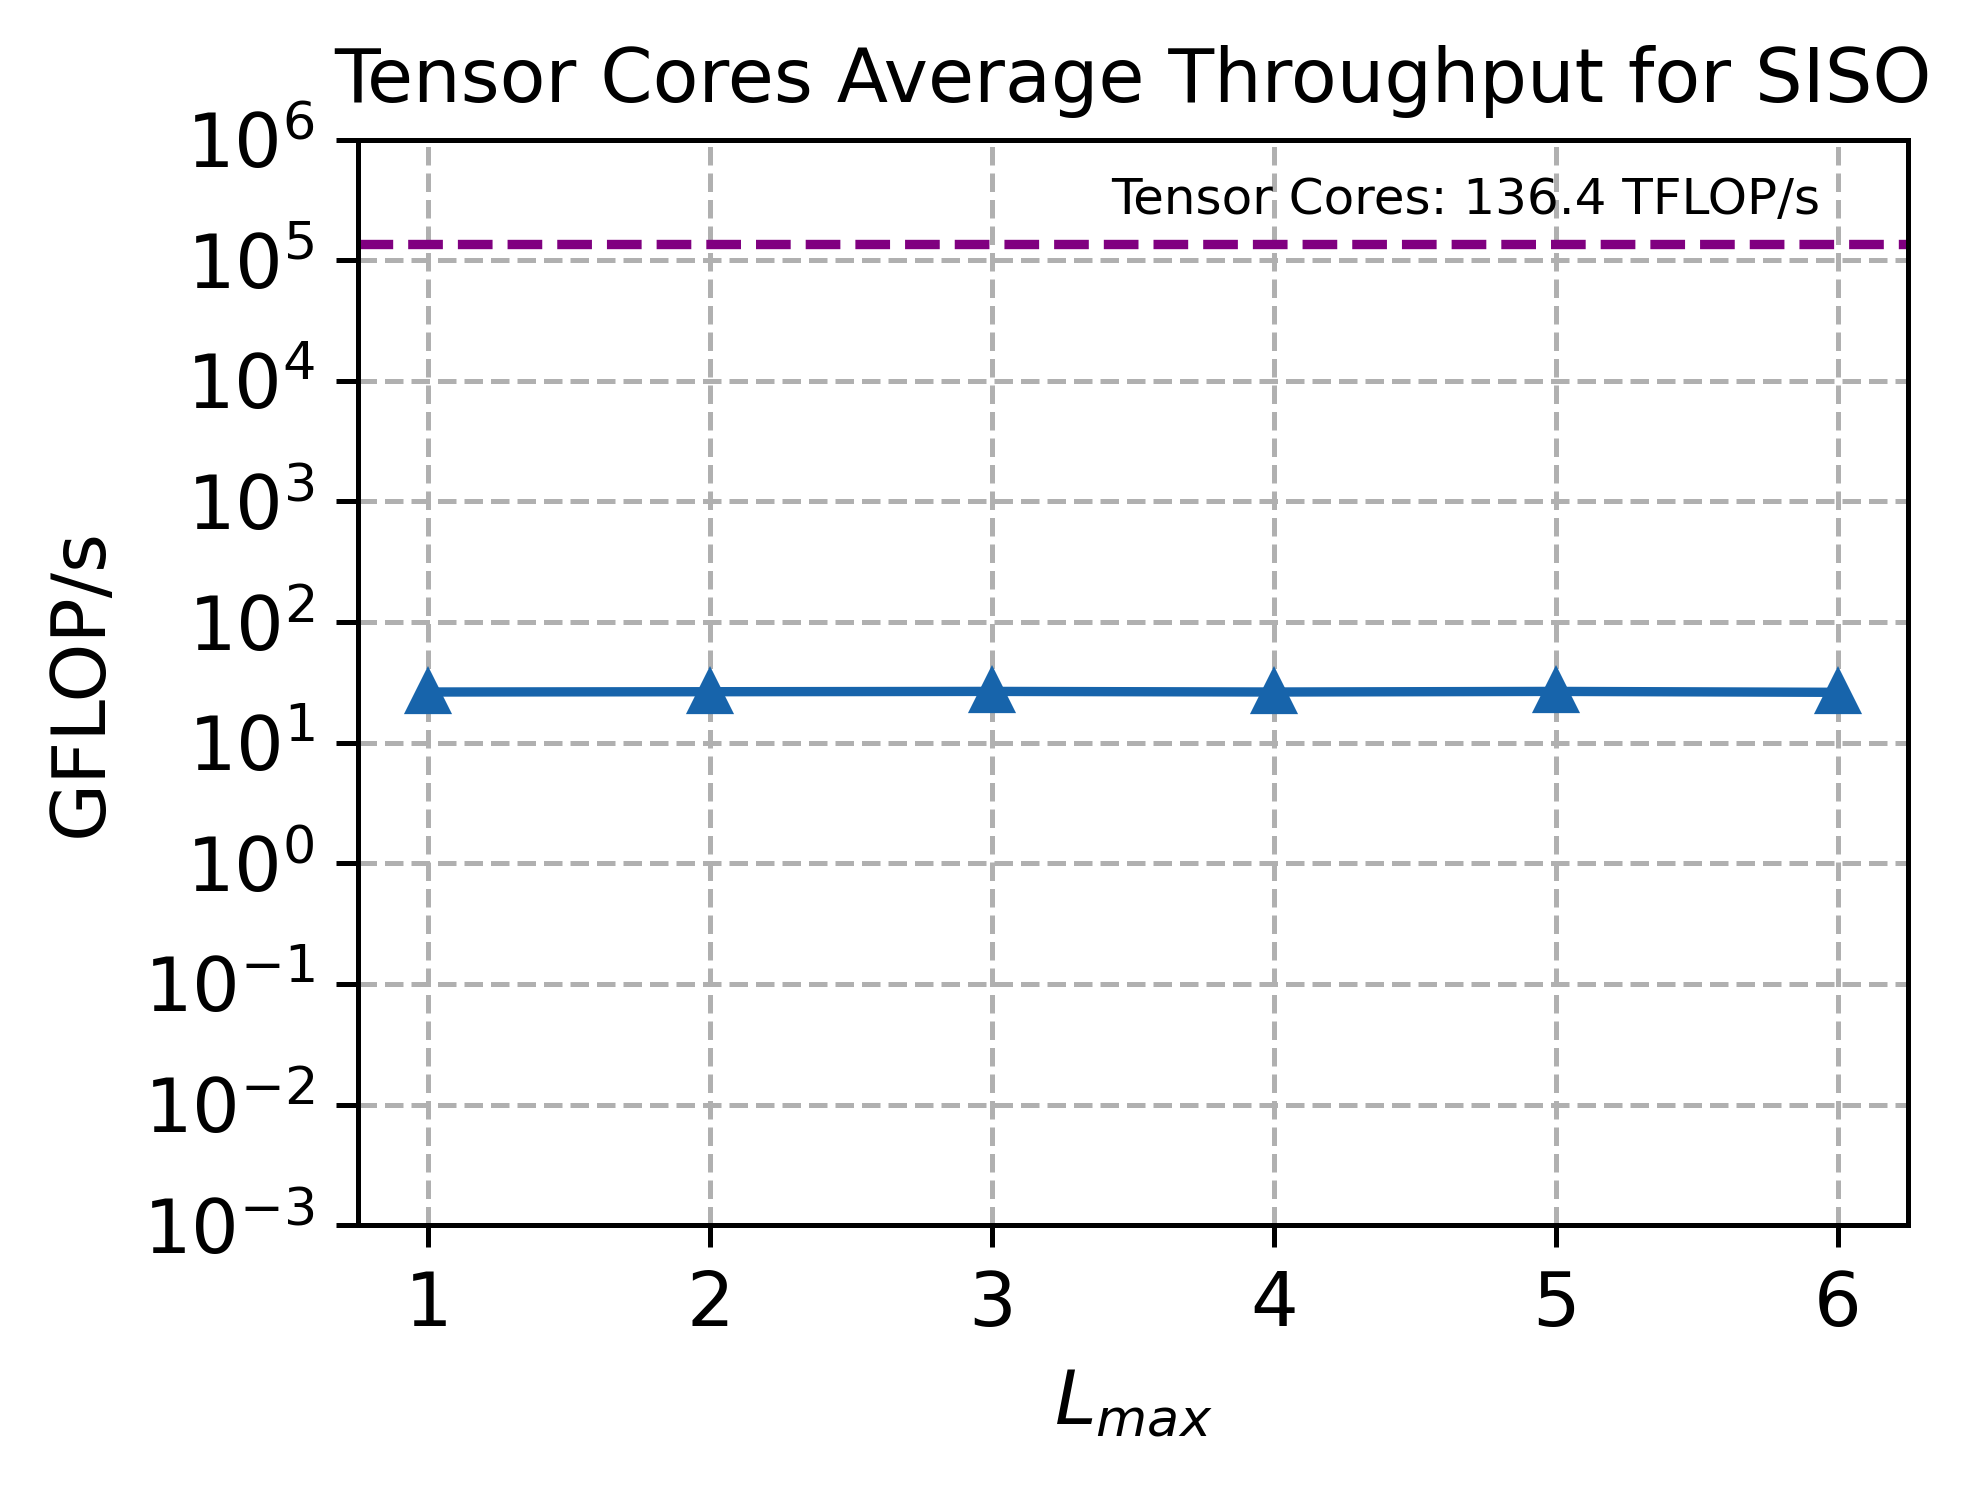

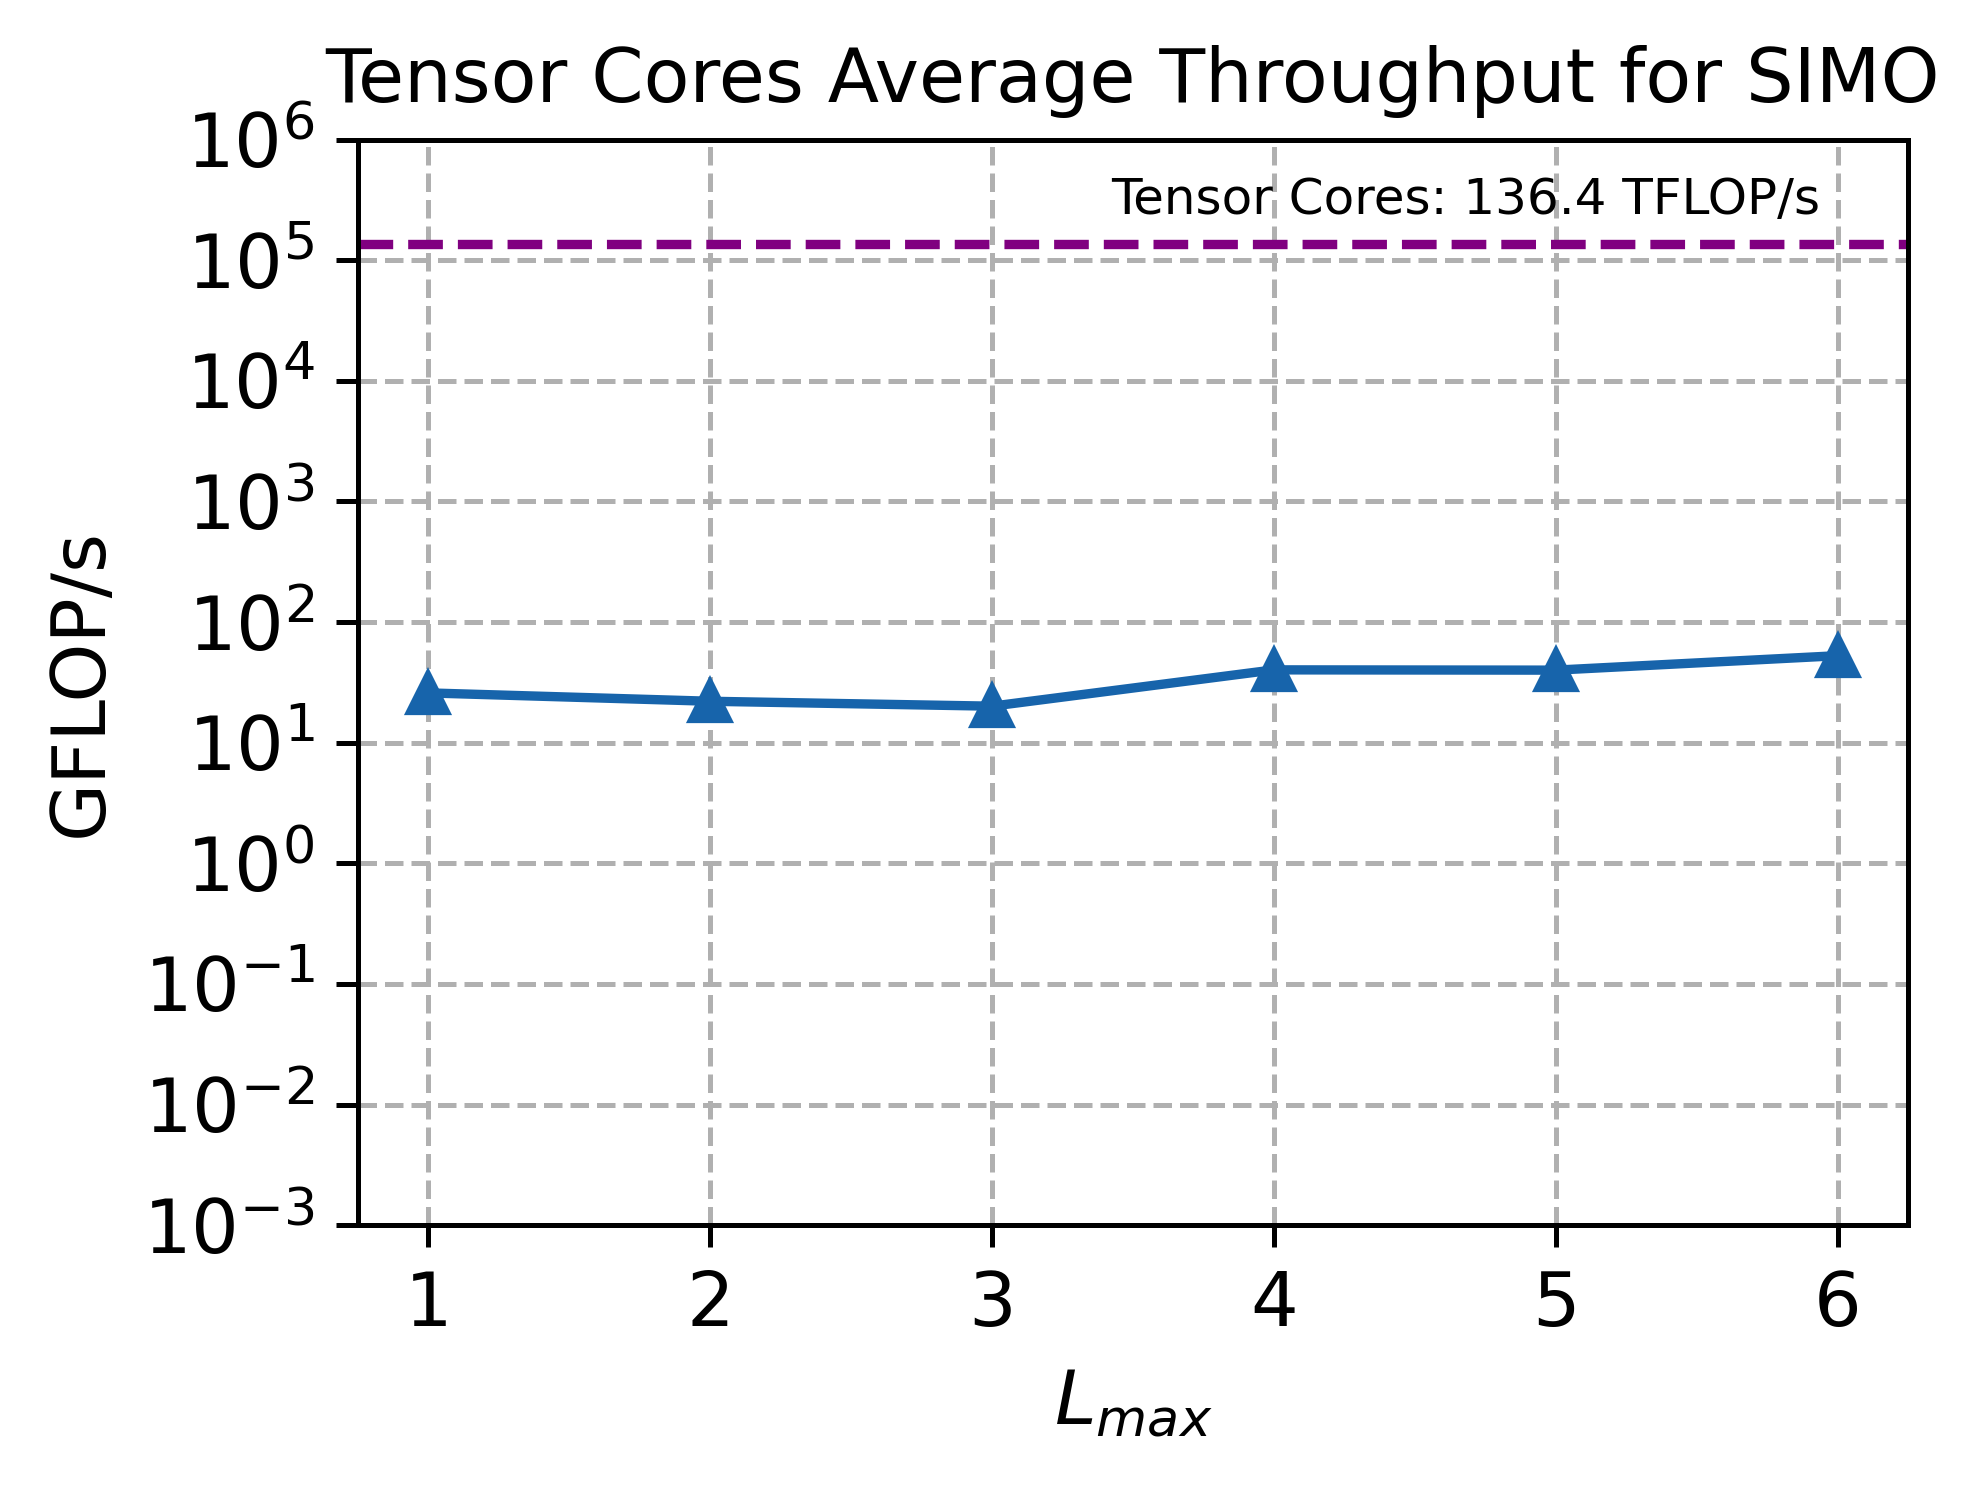

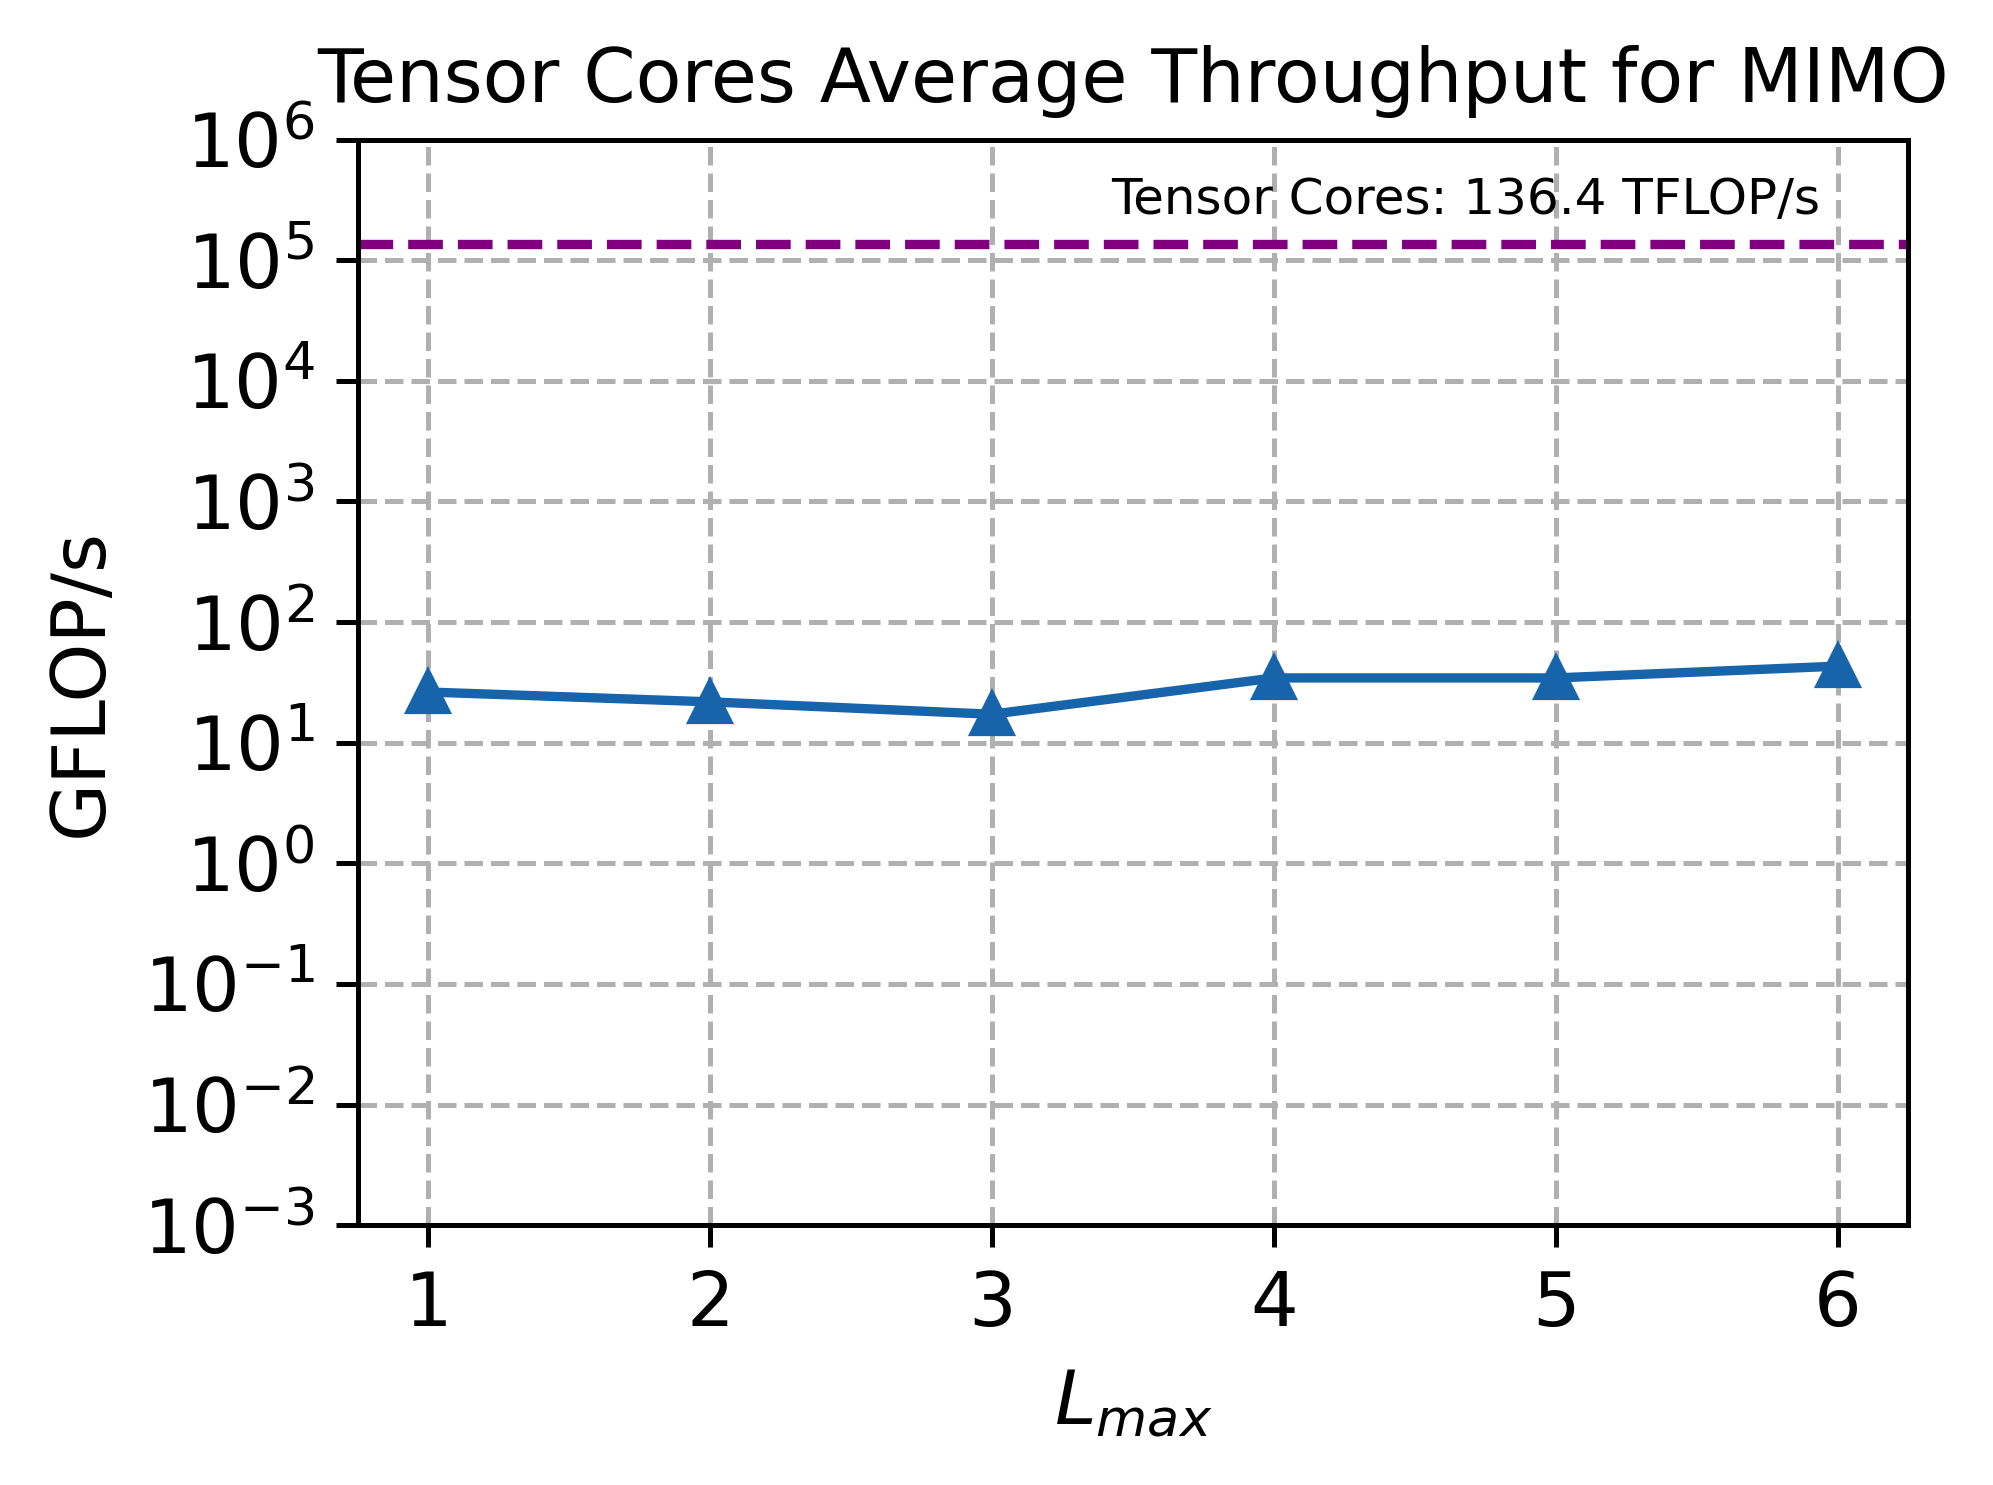

In [18]:
plot_tc_gflops_s_gpu("SISO", 1)
plot_tc_gflops_s_gpu("SIMO", 1)
plot_tc_gflops_s_gpu("MIMO", 1)

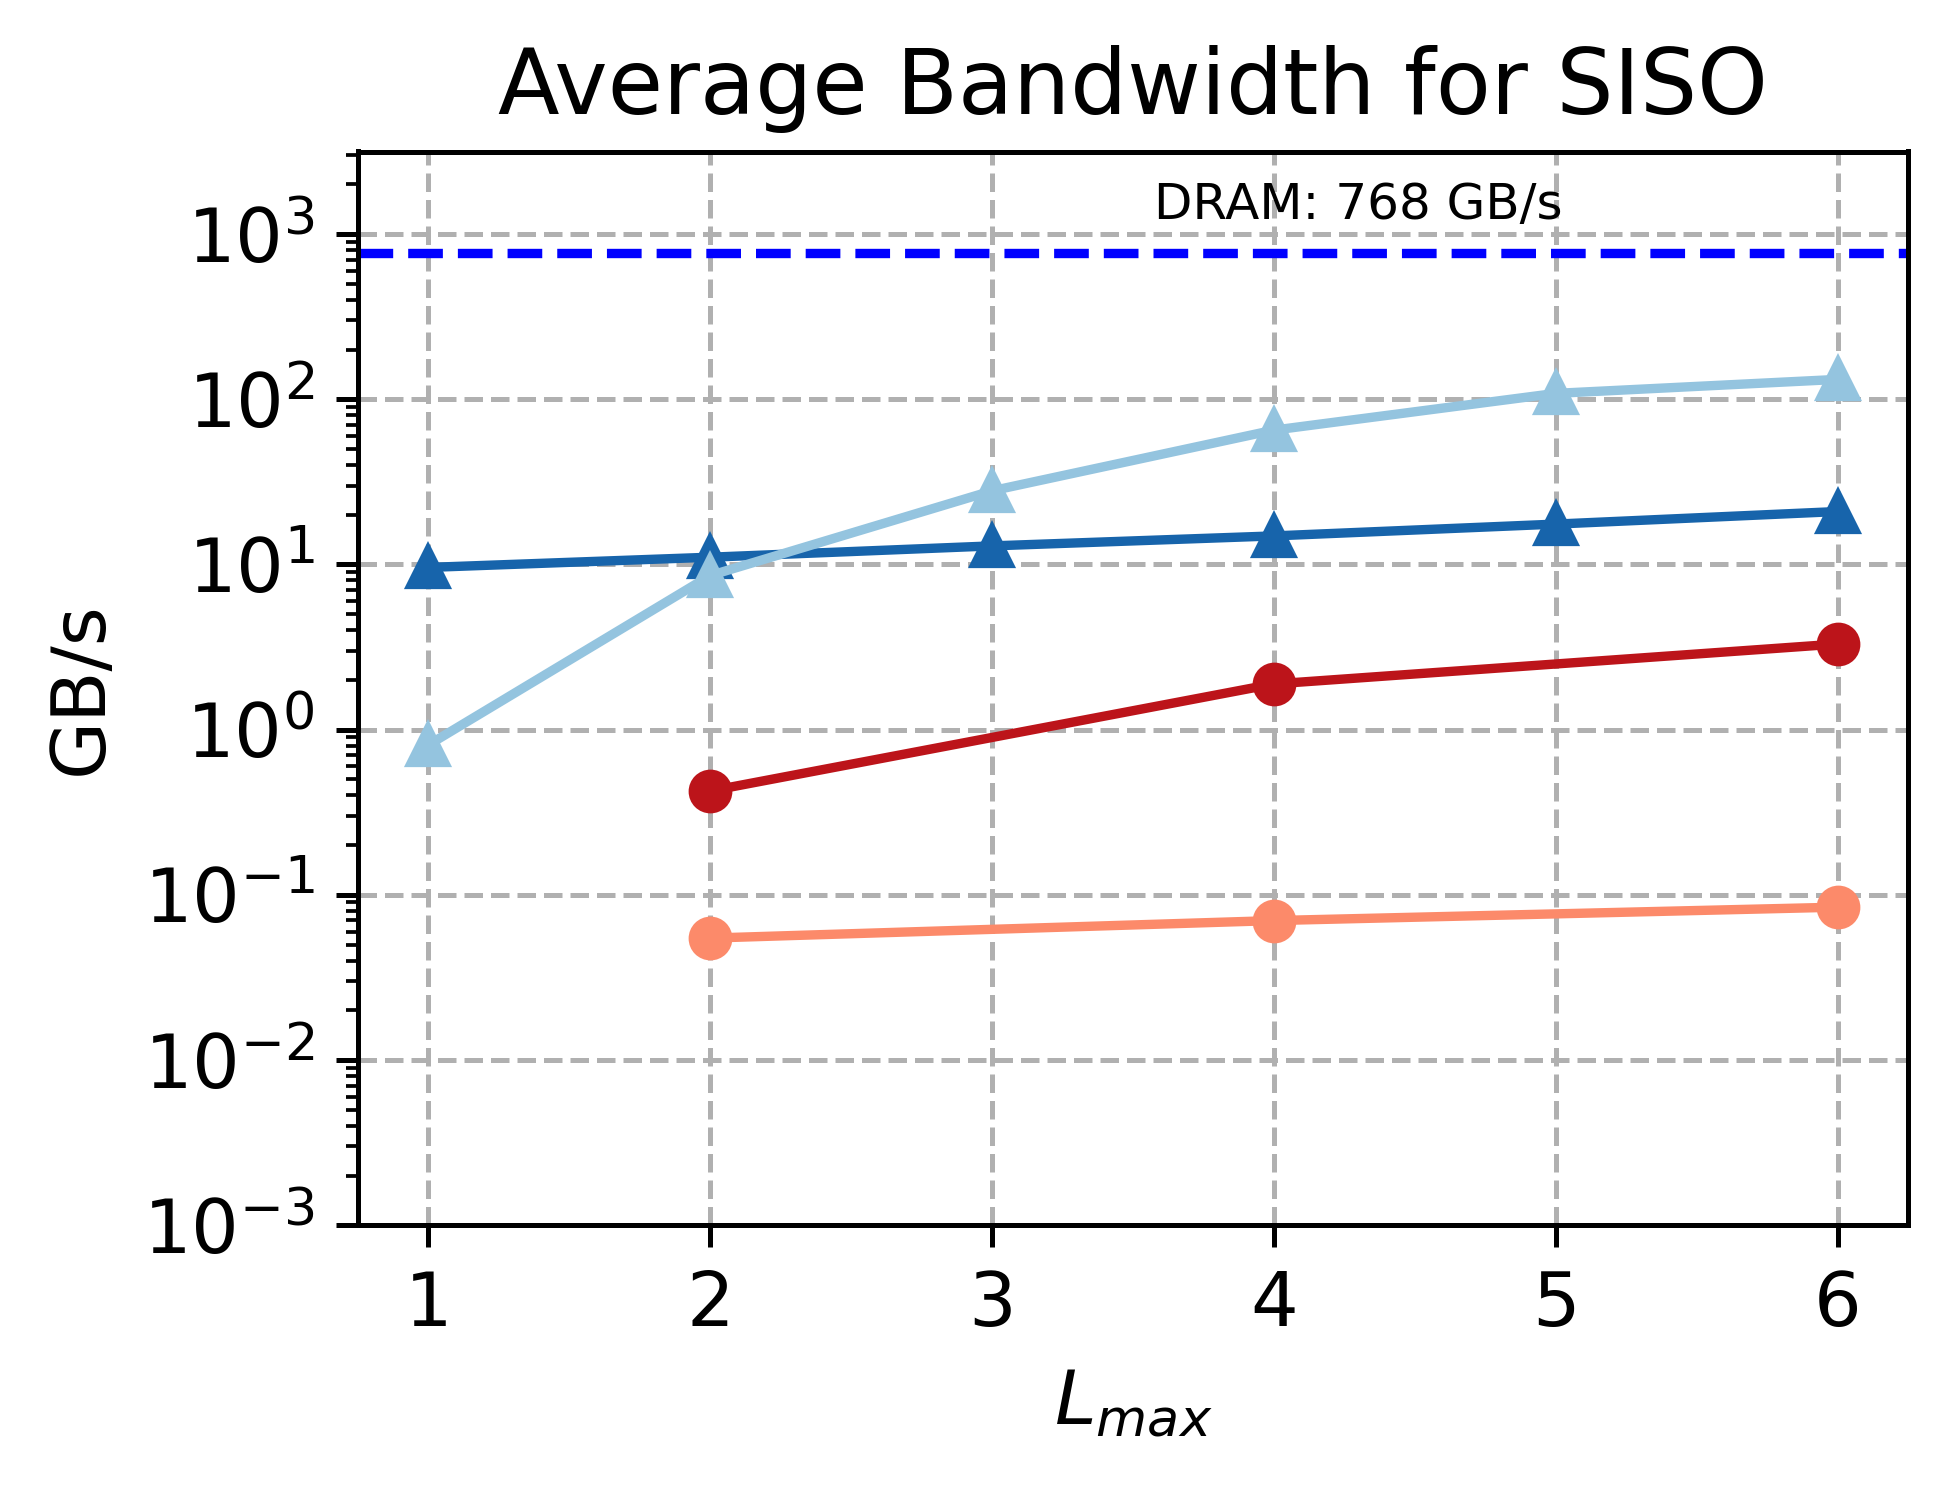

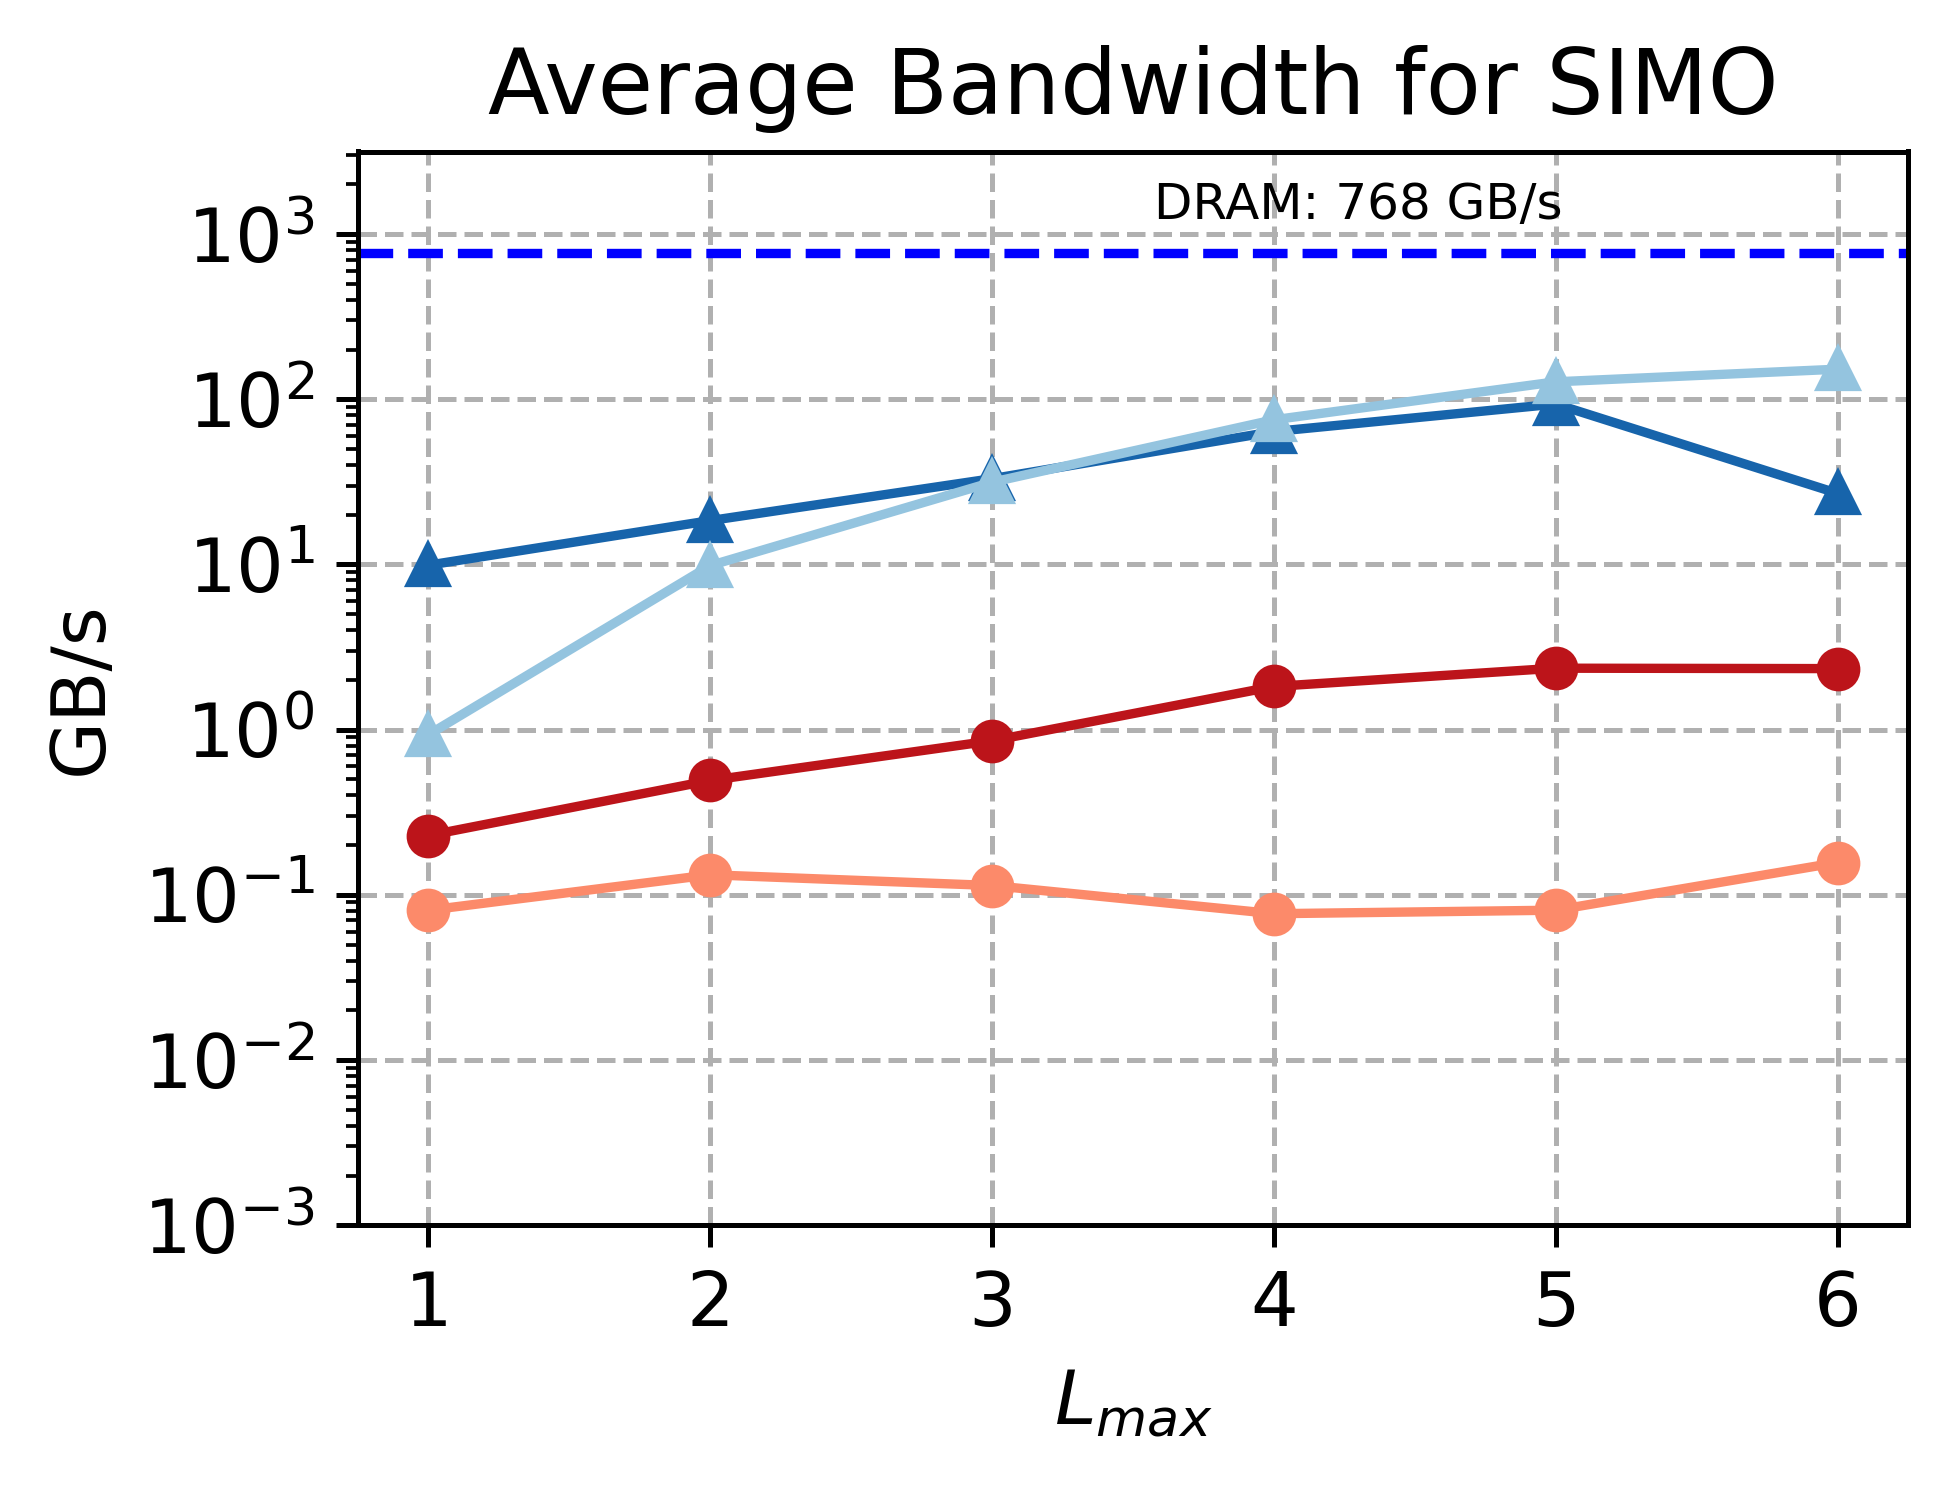

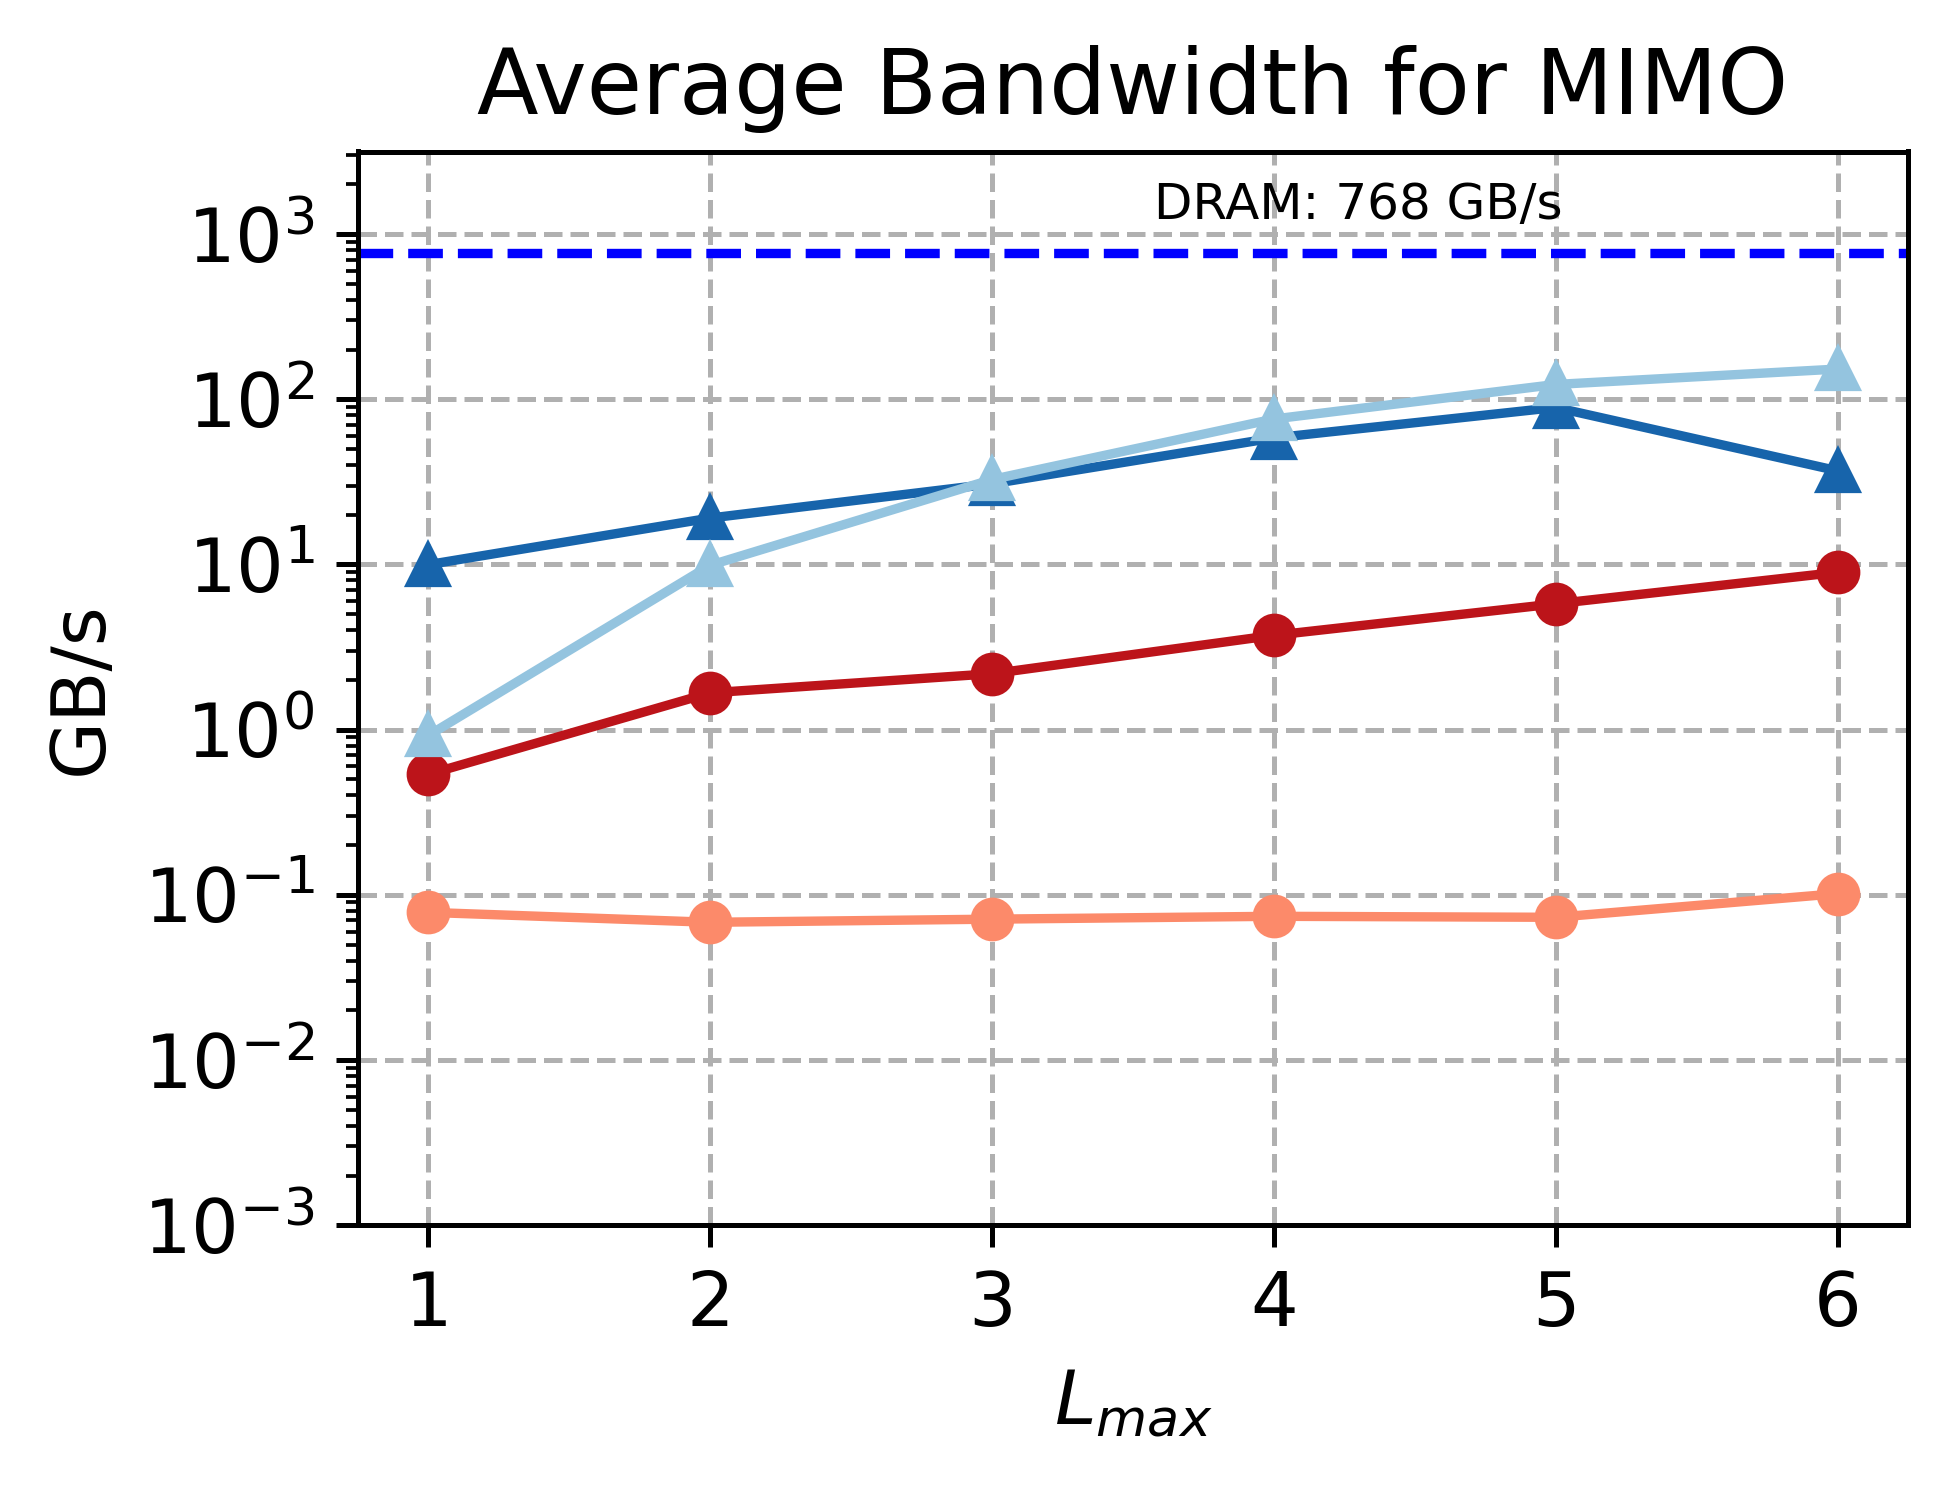

In [19]:

plot_gb_s_gpu("SISO", 1)
plot_gb_s_gpu("SIMO", 1)
plot_gb_s_gpu("MIMO", 1)

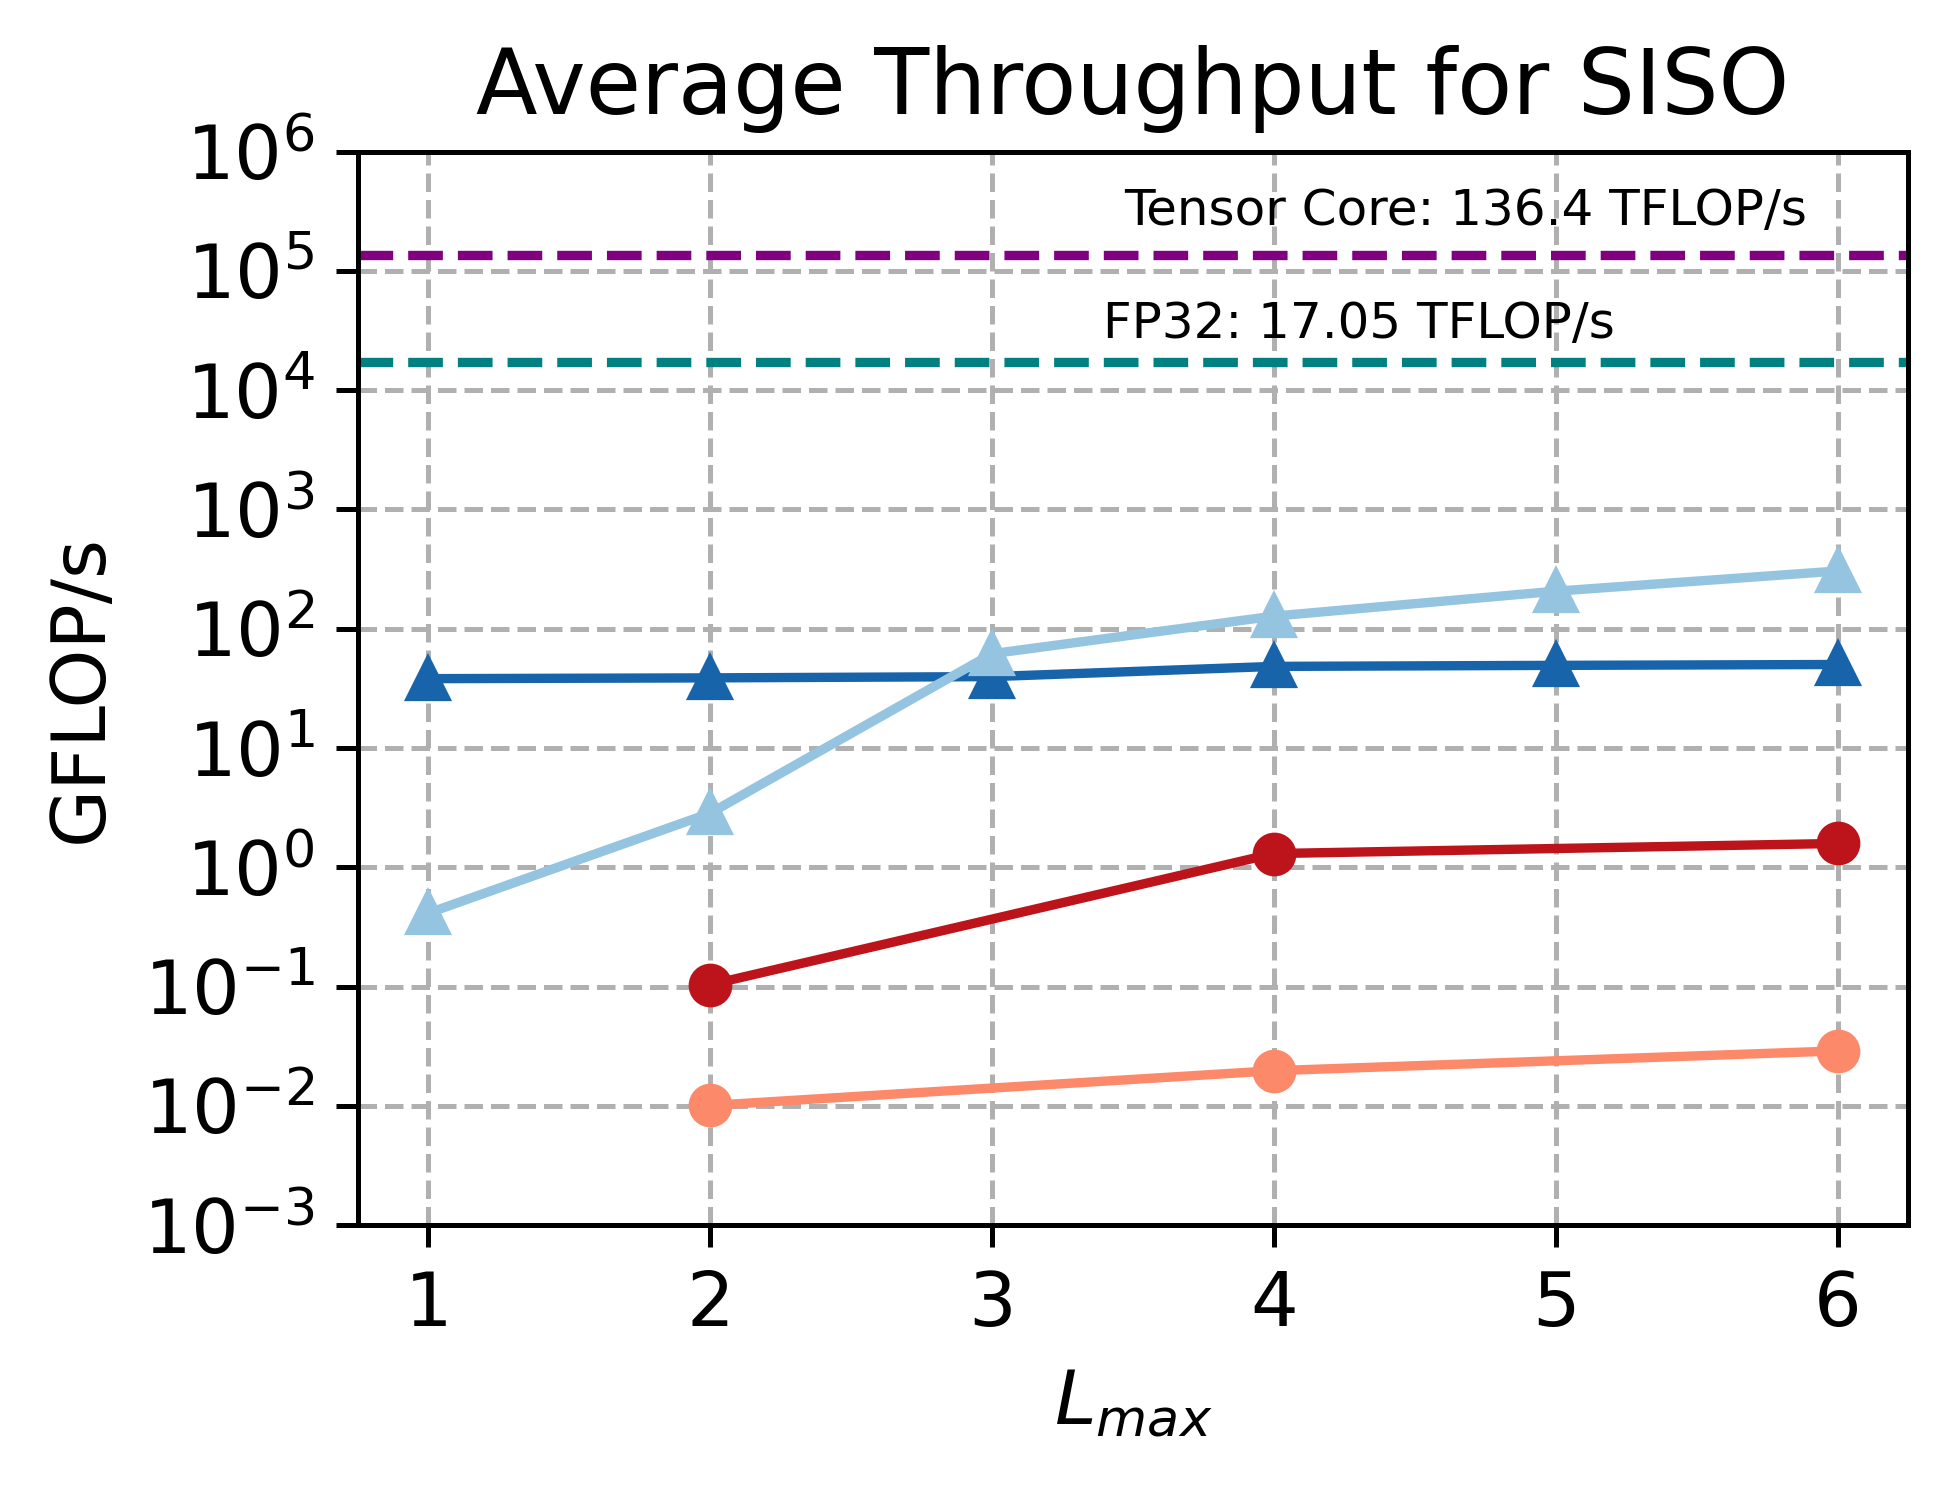

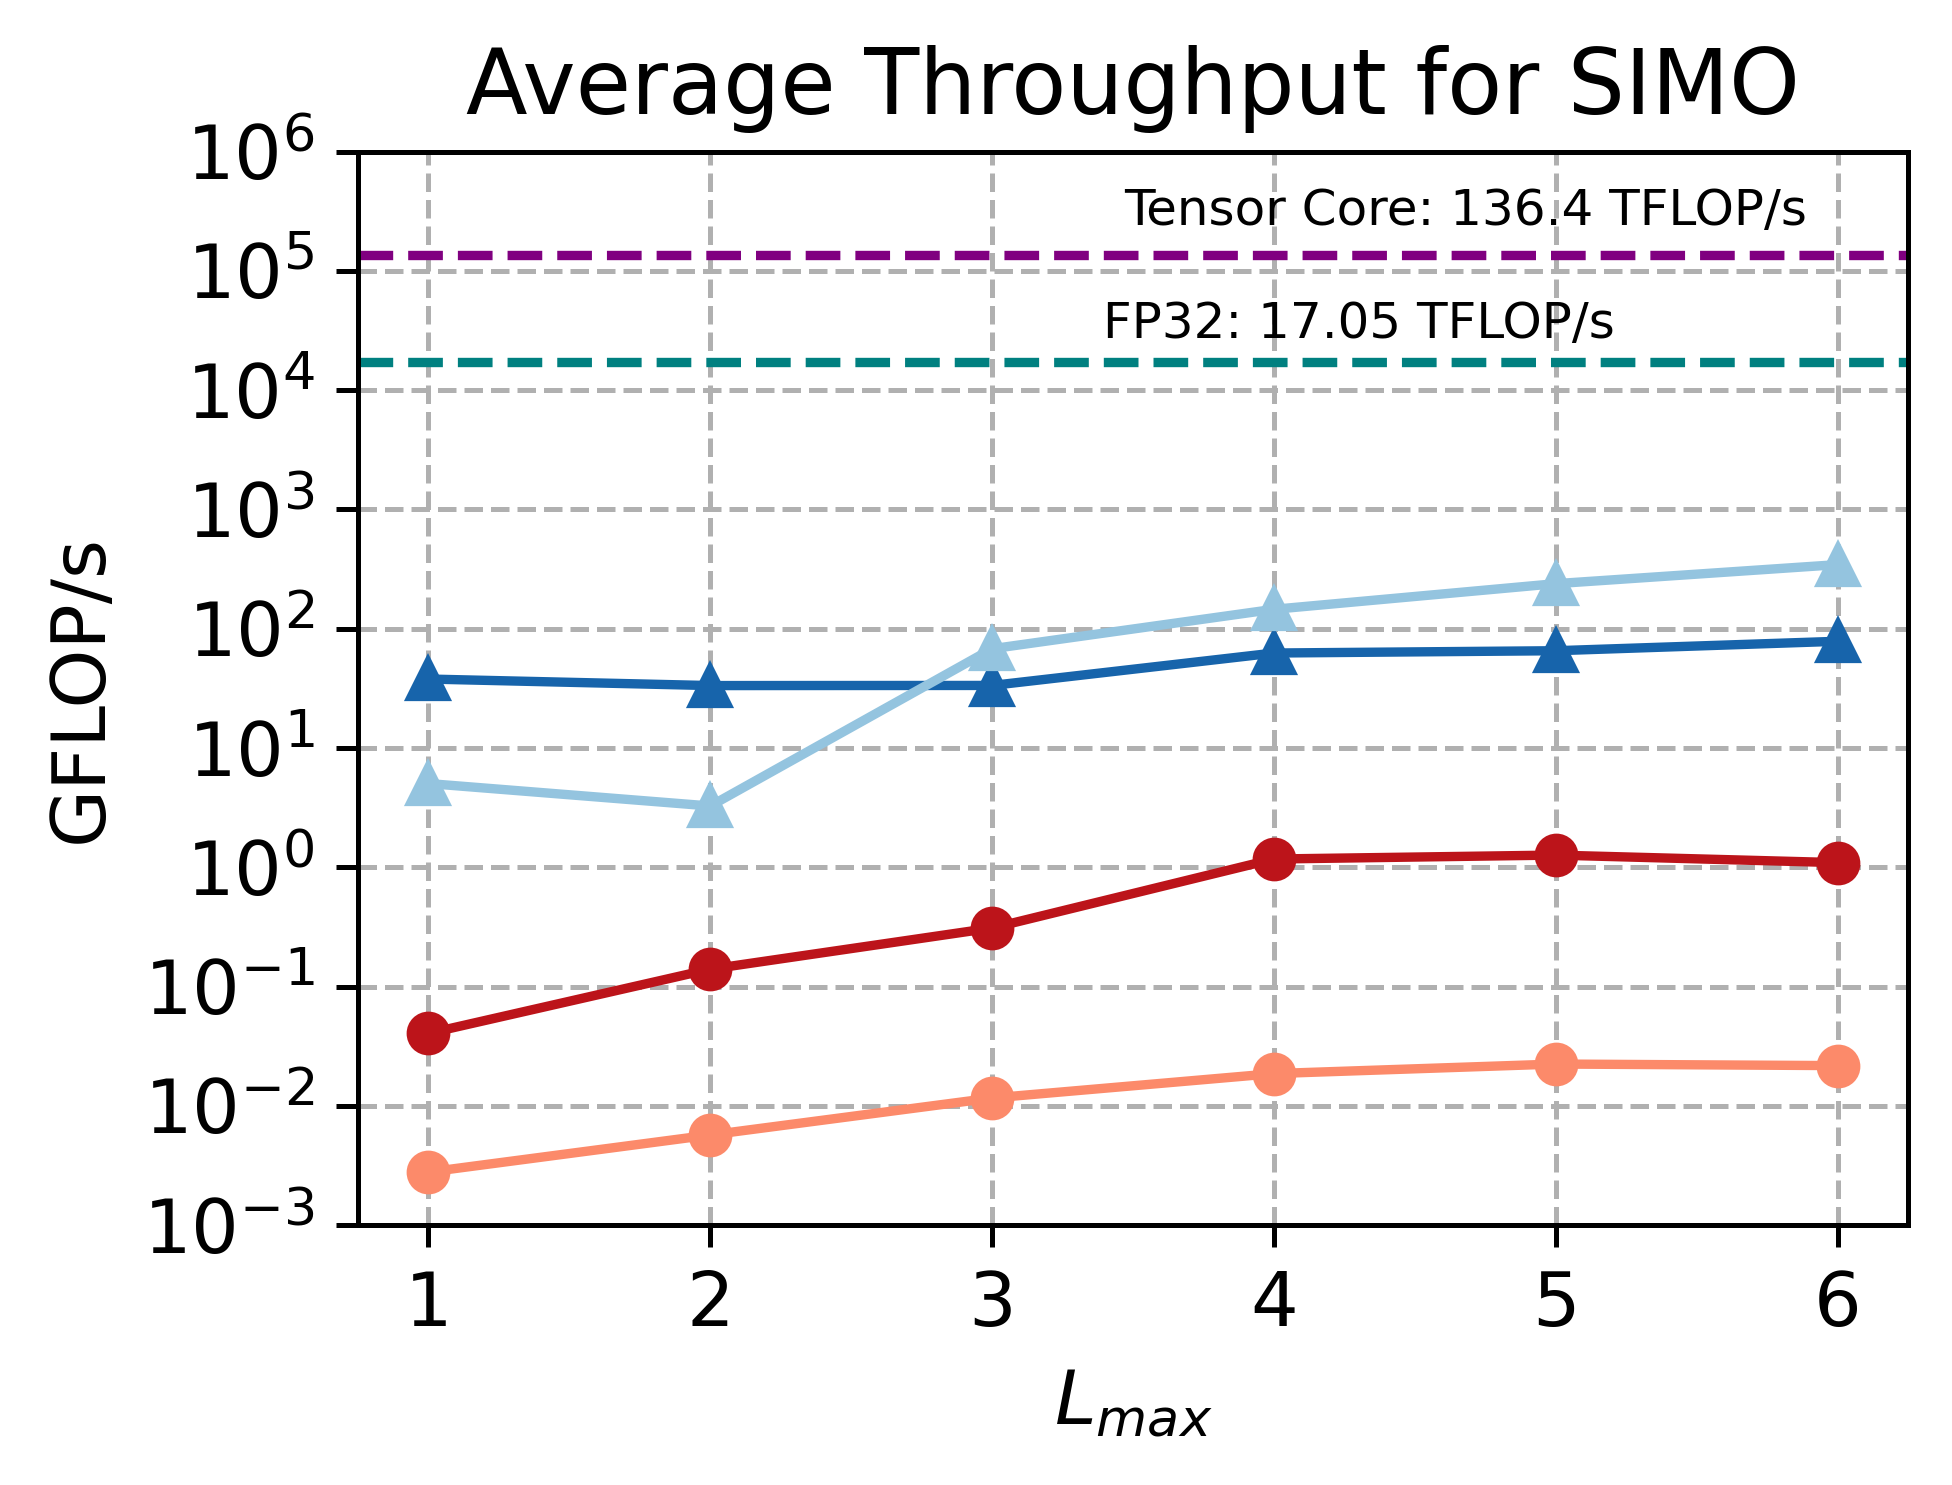

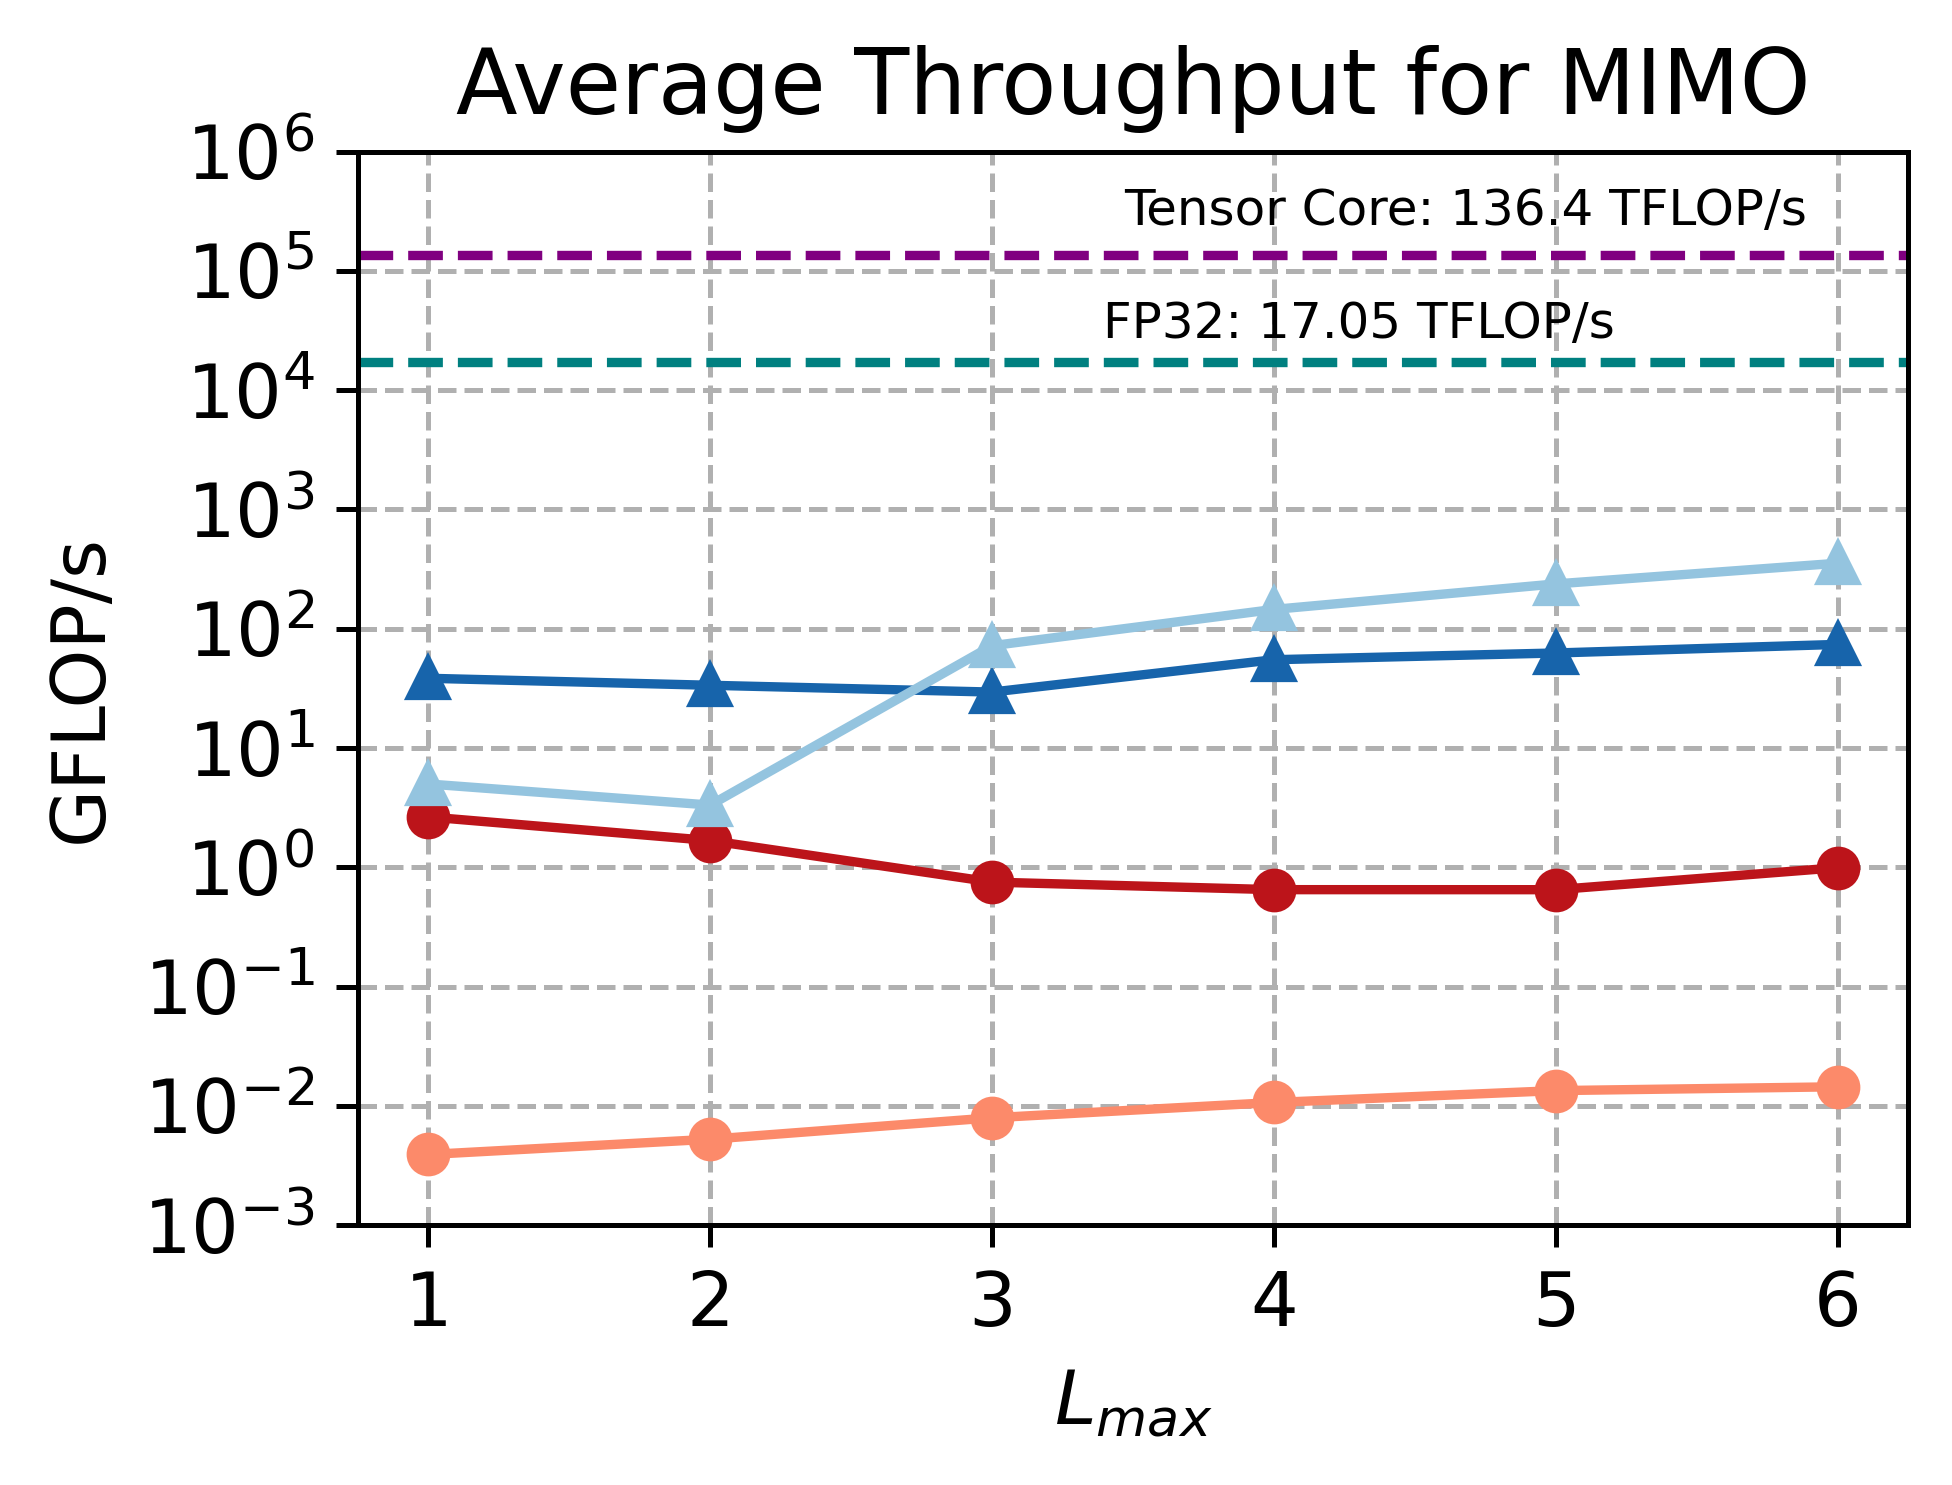

In [20]:
plot_all_gflops_s_gpu("SISO", 1)
plot_all_gflops_s_gpu("SIMO", 1)
plot_all_gflops_s_gpu("MIMO", 1)

In [27]:
df_cpu = pd.read_csv("csv/walltime_cpu_camera_ready.csv")
df_cpu

,lmax,irreps_type,tensor_product_type,batch,wall_time_cpu
0,1,SISO,CGTP-dense,1,0.000010
1,2,SISO,CGTP-dense,1,0.000011
2,3,SISO,CGTP-dense,1,0.000009
3,4,SISO,CGTP-dense,1,0.000014
4,5,SISO,CGTP-dense,1,0.000010
...,...,...,...,...,...
90,8,SIMO,GTP-fourier,1,0.180614
91,3,SIMO,GTP-fourier,1,0.001521
92,4,SIMO,GTP-fourier,1,0.006251
93,5,SIMO,GTP-fourier,1,0.027794


In [28]:
def plot_walltimes_cpu(irreps_type, batch):
    plt.semilogy(query_table(df_cpu, f"{irreps_type}", "CGTP-dense", batch, "lmax"), query_table(df_cpu, f"{irreps_type}", "CGTP-dense", batch, "wall_time_cpu")*1000, label="Clebsch-Gordan (Naive)")
    plt.semilogy(query_table(df_cpu, f"{irreps_type}", "CGTP-sparse", batch, "lmax"), query_table(df_cpu, f"{irreps_type}", "CGTP-sparse", batch, "wall_time_cpu")*1000, label="Clebsch-Gordan (Sparse)")
    plt.semilogy(query_table(df_cpu, f"{irreps_type}", "GTP-grid", batch, "lmax"), query_table(df_cpu, f"{irreps_type}", "GTP-grid", batch, "wall_time_cpu")*1000, label="Gaunt (Naive)", marker="^")
    plt.semilogy(query_table(df_cpu, f"{irreps_type}", "GTP-fourier", batch, "lmax"), query_table(df_cpu, f"{irreps_type}", "GTP-fourier", batch, "wall_time_cpu")*1000, label="Gaunt (Original)", marker="^")
    plt.ylabel("Walltime (ms)")
    plt.xlabel("$L_{max}$")
    plt.ylim(10**-3, 10**2)
    plt.xticks(range(1, 7))
    plt.title(f"Walltime (CPU) for {irreps_type}")
    # ax.legend(fontsize=10, loc='upper left')
    plt.grid(linestyle='--')
    plt.tight_layout()
    plt.savefig(f"plots/walltime_cpu_{irreps_type}.pdf")
    plt.show()
    

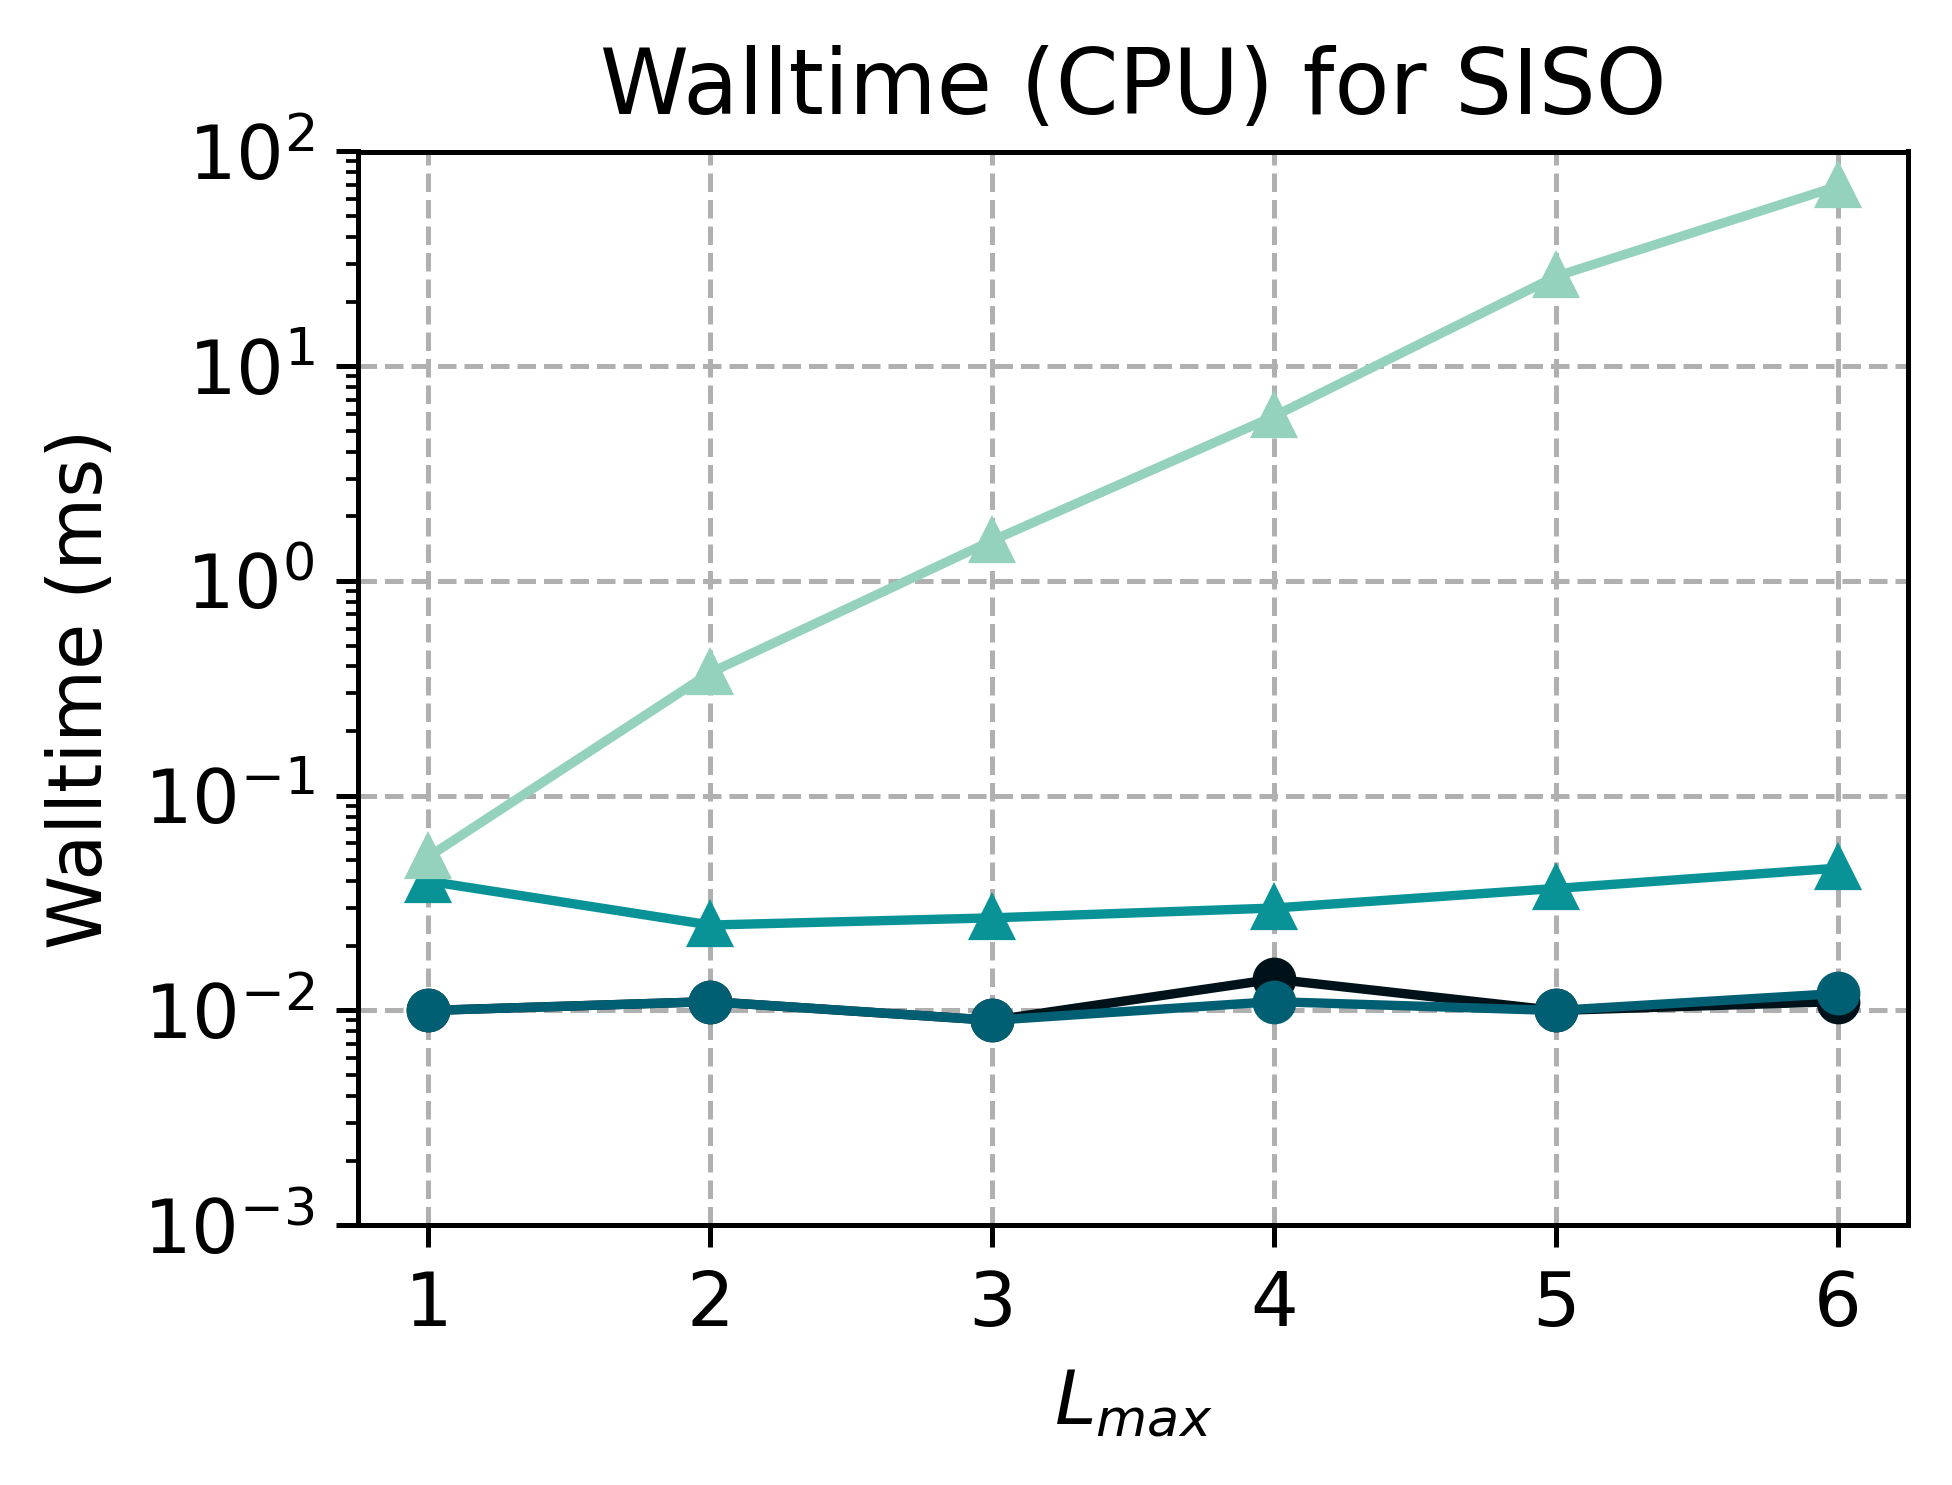

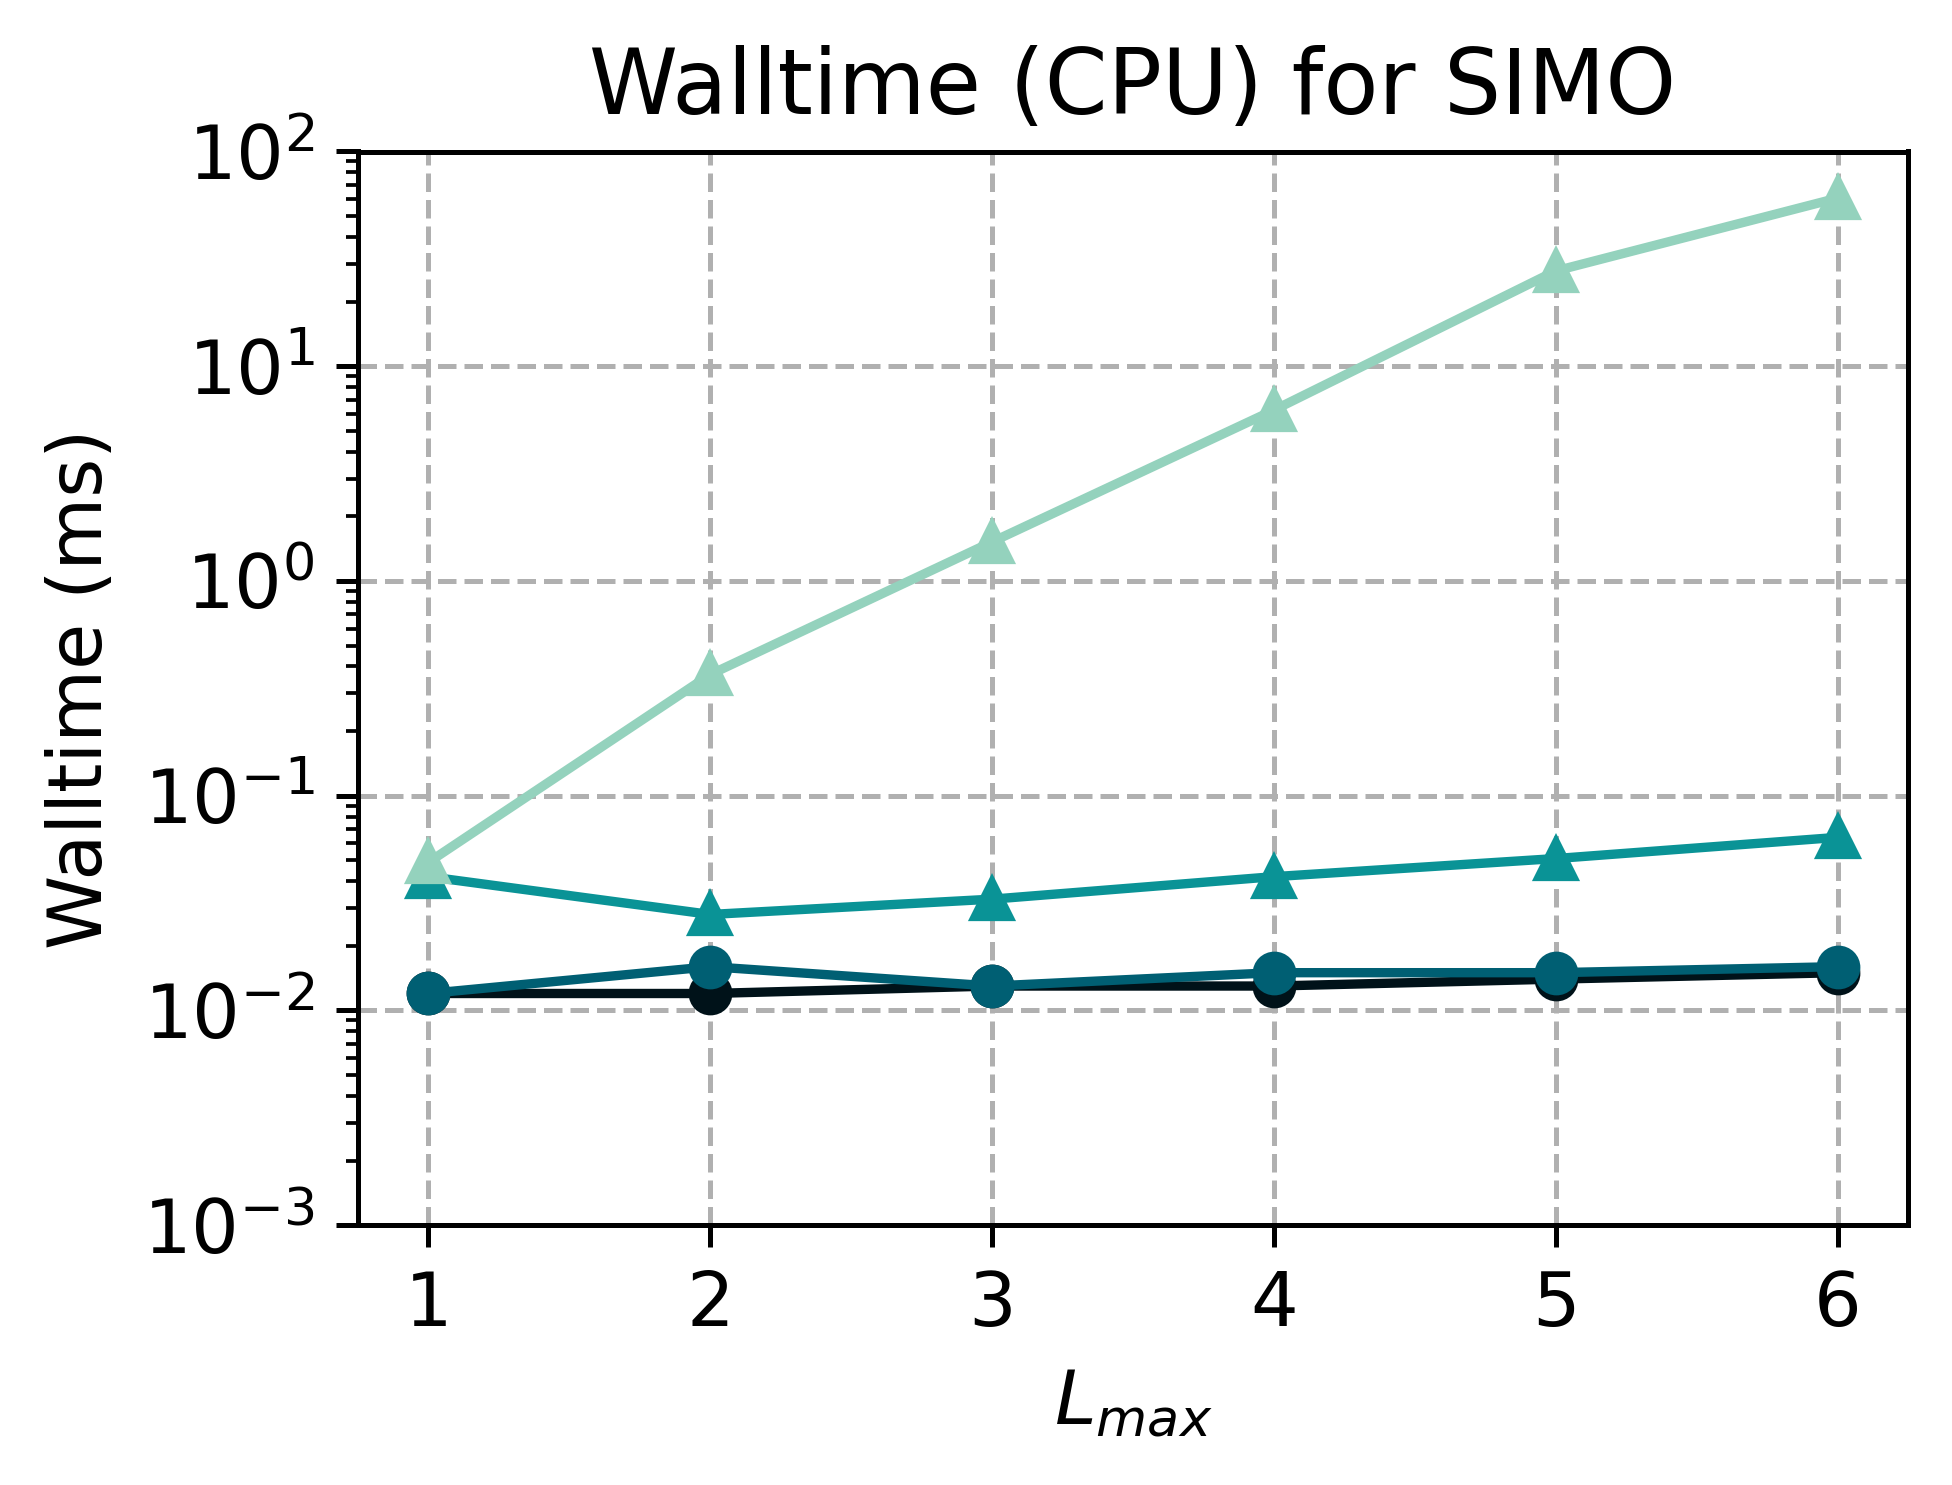

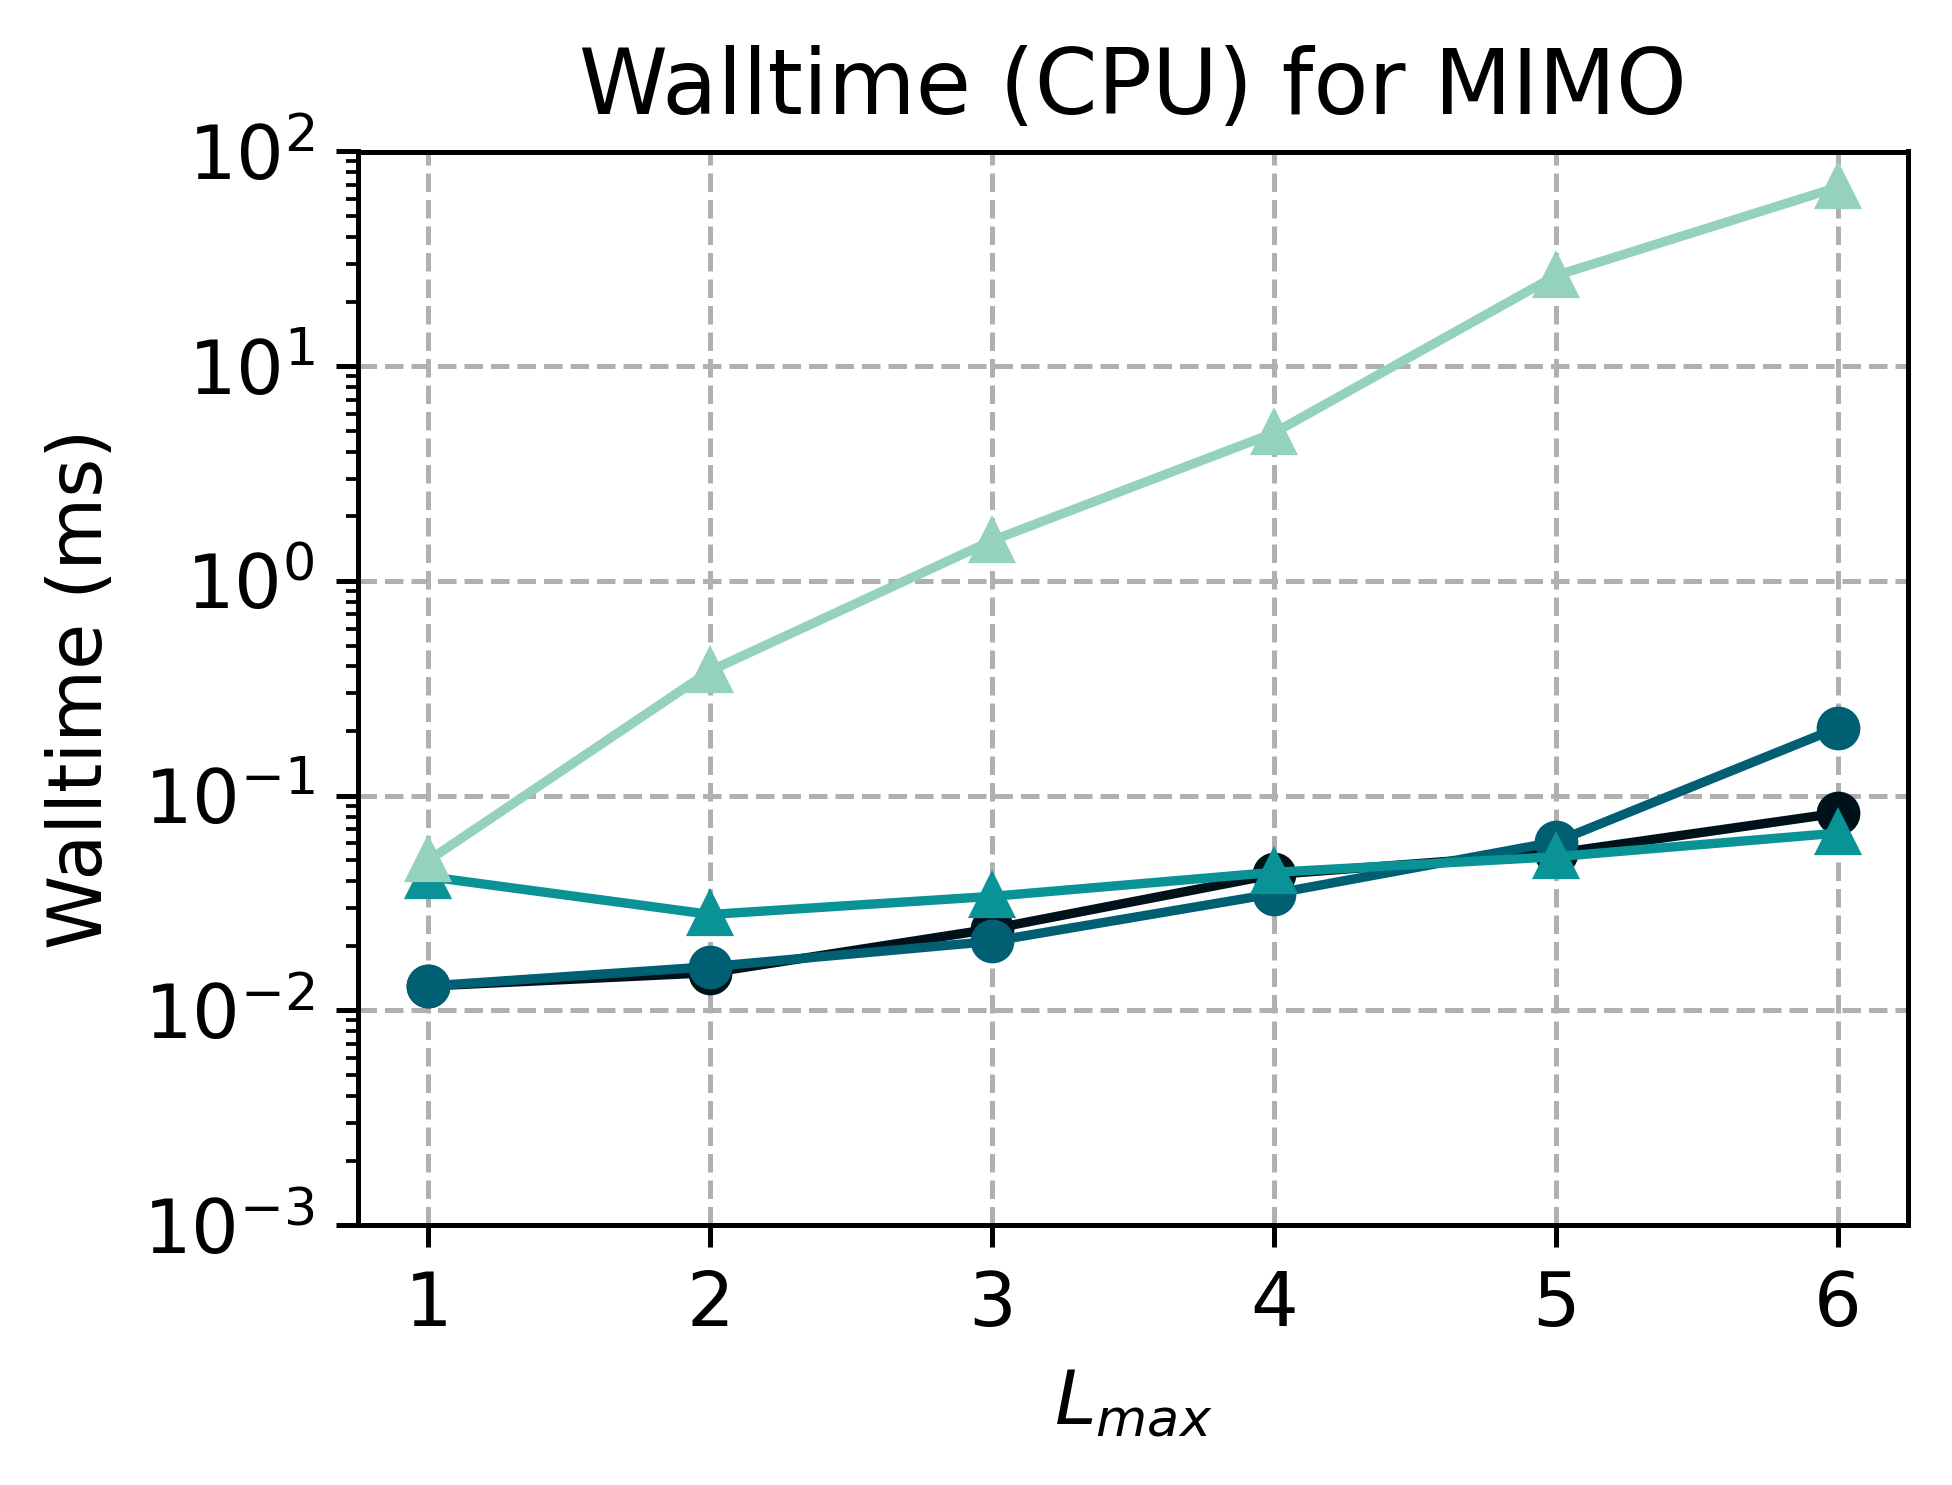

In [30]:
plot_walltimes_cpu("SISO", 1)
plot_walltimes_cpu("SIMO", 1)
plot_walltimes_cpu("MIMO", 1)